# Taller 3 -Manejo de Archivos y BioPython
## Fundamentos en Biología Computacional
## 2019-1, Prof. Javier Correa

Nota: Se calificará que el código sea lo más simple, claro, original y eficiente. No usar funciones no realizadas por ustedes mismos.

Competencias: 1. Resuelve problemas de ciencias de los datos utilizando razonamiento lógico y programación en python. 2. Manipula archivos con formatos utilizados en bioinformática para extaeer información relevante. 3. Utiliza efectivamente módulos y paquetes de python especializados para biología.

Tener en cuenta: a. desarrollar y aplicar funciones en python, b. manipular archivos (entrada y salida), c. utilizar librerias especializadas (Biopython).<br>
Ejercicio:<br>

1. Un investigador desea desarrollar un Script en python, que le permita encontrar el grupo monifilético en común entre una lista de especies de plantas (archivo adjunto: lista_mercado.tsv). La información sobre la taxonomía de cada una de las especies fue descargada de la base de datos del GenBank, luego concatenada y se encuentra en formato .gb anexo <br> 

In [1]:
%%bash
cat lista_mercado.tsv

Couldn't find program: 'bash'


In [1]:
%%bash
head -20 Mercado.gb

LOCUS       MG859922              122198 bp    DNA     circular PLN 30-APR-2018
DEFINITION  Pisum sativum subsp. elatius isolate CE1 chloroplast, complete
            genome.
ACCESSION   MG859922
VERSION     MG859922.1
KEYWORDS    .
SOURCE      chloroplast Pisum sativum subsp. elatius
  ORGANISM  Pisum sativum subsp. elatius
            Eukaryota; Viridiplantae; Streptophyta; Embryophyta; Tracheophyta;
            Spermatophyta; Magnoliophyta; eudicotyledons; Gunneridae;
            Pentapetalae; rosids; fabids; Fabales; Fabaceae; Papilionoideae;
            Fabeae; Pisum.
REFERENCE   1  (bases 1 to 122198)
  AUTHORS   Bogdanova,V.S., Mglinets,A.V., Shatskaya,N.V., Kosterin,O.E. and
            Vasiliev,G.V.
  TITLE     Cryptic divergences in the genus Pisum L., as revealed by
            comparative analysis of complete plastid genomes
  JOURNAL   Unpublished
REFERENCE   2  (bases 1 to 122198)
  AUTHORS   Bogdanova,V.S., Mglinets,A.V., Shatskaya,N.V., Kosterin,O.E. and


#### $\rightarrow$ Con el archivo "Mercado.gb";<br>
- A. Desarrolle un script con el cual pueda extrer la información relacionada con la taxonomía de cada especie.<br>
- B. Organice esta información en una objeto tipo lista o diccionario.<br>
- C. Cree una función que reciba el objeto anterior y compare las clasificaciones entre las diferentes especies para retornar el ancestro monofilético común más reciente a todas ellas. <br> Ejemplo: Embryophyta

In [216]:
#A. y B. Taxonomía de cada especie en formato lista
from Bio import SeqIO
mercado = SeqIO.parse("Mercado.gb","gb")
reads=[]
for read in mercado:
    reads.append(read.annotations['taxonomy']) #La lista reads contiene la taxonomía de cada una de las 14 especies en cada índice i. Es decir, la posición reads[0] contiene 
                                                                           #la taxonomía de Pisum, reads[1] la de Solamun, y así sucesivamente
reads

[['Eukaryota',
  'Viridiplantae',
  'Streptophyta',
  'Embryophyta',
  'Tracheophyta',
  'Spermatophyta',
  'Magnoliophyta',
  'eudicotyledons',
  'Gunneridae',
  'Pentapetalae',
  'rosids',
  'fabids',
  'Fabales',
  'Fabaceae',
  'Papilionoideae',
  'Fabeae',
  'Pisum'],
 ['Eukaryota',
  'Viridiplantae',
  'Streptophyta',
  'Embryophyta',
  'Tracheophyta',
  'Spermatophyta',
  'Magnoliophyta',
  'eudicotyledons',
  'Gunneridae',
  'Pentapetalae',
  'asterids',
  'lamiids',
  'Solanales',
  'Solanaceae',
  'Solanoideae',
  'Solaneae',
  'Solanum'],
 ['Eukaryota',
  'Viridiplantae',
  'Streptophyta',
  'Embryophyta',
  'Tracheophyta',
  'Spermatophyta',
  'Magnoliophyta',
  'Liliopsida',
  'Arecaceae',
  'Arecoideae',
  'Cocoseae',
  'Attaleinae',
  'Cocos'],
 ['Eukaryota',
  'Viridiplantae',
  'Streptophyta',
  'Embryophyta',
  'Tracheophyta',
  'Spermatophyta',
  'Magnoliophyta',
  'eudicotyledons',
  'Gunneridae',
  'Pentapetalae',
  'rosids',
  'fabids',
  'Rosales',
  'Rosaceae',


In [217]:
def ancestrocomún (lista): #C. Función que devuelve el ancestro común
    i=0; j=0; salir=0
    while i<10: 
        if salir==1: #Si se cumple esta condición, quiere decir que ya hallé el ancestro común
            break
        compare=lista[0][i] #variable de comparación, sólo debo comparar la taxonomía de la sublista reads[0] con los otros
        j=0
        while j<14:  
            if compare!=lista[j][i]: #cuando encuentre un dato en reads[0][i] que no sea igual, quiere decir que el ancestro común estaba en la posición anterior reads[0][i-1]
                ancestro=str(lista[0][i-1])
                salir=1
            j+=1
        i+=1
    return ancestro

ancestrocomún(reads)

'Magnoliophyta'

2 . El mismo investigador está ahora interesado en hacer una caracterización funcional de los genomas de los cloroplastos que poseen estas especies. Para esto y continuando con el archivo del punto anterior (Mercado.gb), resuelva las siguientes preguntas:

- A. Una forma de diferenciar una especie de otra es a través de la estimación del contenido de Guaninas y Citosinas en los genomas. Utilizando funciones de biopython responder; ¿Cuales son los valores de %GC para cada especie? retorne un diccionario con las especies como llave y su respectivo valor de %GC. Consulte el diccionario y muestre ¿Qué especie presenta el mayor %GC? ¿Y cual el más bajo? Represente los resultados en un dendograma donde se relacione las proximidades en los contenidos de %GC (puede usar Ploty, numpy, etc).

- B. Otra forma de caracterizar los genomas es estimando la frecuencia con las que aparecen los codones en los genes codificantes. Usando biopython hacer una función que me extraiga los genes codificantes para cada genoma del cloroplasto del archivo .gb, definir una función que me permita estimar la frecuencia de cada uno de los codones usados por la célula. Con las herramientas anteriores y usando funciones accesorias grafique la frecuencia de estos codones versus el codón encontrado para cada una de las especies. Finalmente, responda: ¿Qué especie presenta el codón más inusual? ¿Qué aminoácido es el mas prevalente y menos prevalente?



In [218]:
from Bio import SeqIO
mercado = SeqIO.parse("Mercado.gb","gb")
reads=[]; posiciones=[0]*14; gc=[0]*14
for read in mercado: #se extraen los valores GC (en valores de 0-1) de las diferentes secuencias
    reads.append((read.seq.count('G')+read.seq.count('C'))/(read.seq.count('G')+read.seq.count('C')+read.seq.count('A')+read.seq.count('T'))) 
    #Se define el diccionario con fuerza bruta
diccionario = dict({'Pisum sativum': reads[0], 'Solanum melongena': reads[1], 'Cocos nucifera': reads[2], 'Prunus persica': reads[3], 'Cicer arietinum': reads[4],
    'Lactuca sativa': reads[5], 'Lens culinaris': reads[6] ,'Olea europea': reads[7] , 'Solanum tuberosum': reads[8], 'Ananas comosus': reads[9],
    'Chenopodium quinoa': reads[10], 'Brassica oleraceae': reads[11], 'Solanum lycopersicum': reads[12], 'Manihot esculenta': reads[13]}) 

for k, v in diccionario.items(): #muestro el diccionario
    print(k,v)
    #gc=k,v
   # SeqIO.write(str(gc[0])+str(gc[1]),'lista','txt')
#str(gc[0])+str(gc[1])
#SeqIO.write(v,"lista.txt","fasta")

Pisum sativum 0.34837732760384693
Solanum melongena 0.3771035546699235
Cocos nucifera 0.374382835724441
Prunus persica 0.3675961721275112
Cicer arietinum 0.33906271195908044
Lactuca sativa 0.37549420050794646
Lens culinaris 0.3442549627135736
Olea europea 0.37812247411569994
Solanum tuberosum 0.3787344184609045
Ananas comosus 0.3737314891377885
Chenopodium quinoa 0.3724374706454366
Brassica oleraceae 0.3636138387908663
Solanum lycopersicum 0.3786184803026014
Manihot esculenta 0.3587297851387091


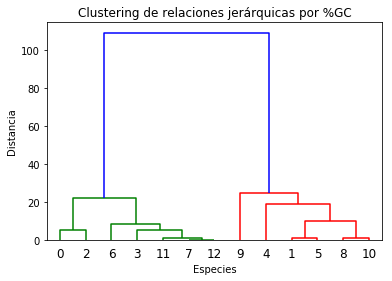

In [212]:
#Dendograma
import numpy as np      #Importar librerías
import matplotlib.pyplot as plt
import pandas as pd
#Base da datos con 2 columnas: indicador de la sp (en el mismo orden del punto anterior) y el %GC (los mismos valores anteriores multiplicados por 100)
dataset = pd.read_csv('GC.csv')
X = dataset.iloc[:, [1]].values
#importo y configuro los valores del dendograma
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Clustering de relaciones jerárquicas por %GC')
plt.xlabel('Especies')
plt.ylabel('Distancia')
plt.show()

In [219]:
from Bio import SeqIO 
mercado = SeqIO.parse("Mercado.gb","gb")
reads=[]
for read in mercado: #Crear una lista con los nombres de las secuencias y poder guardarlas en el bloque posterior,en donde se guarda el CDS de cada organismo según su nombre
    reads.append(read.name) 
reads

['MG859922',
 'MH283711',
 'KX028884',
 'HQ336405',
 'EU835853',
 'DQ383816',
 'NC_027152',
 'MG255765',
 'DQ231562',
 'KR336549',
 'MF805727',
 'KR233156',
 'KP117024',
 'EU117376']

In [221]:
from Bio import SeqIO
from Bio.Alphabet import generic_alphabet
from Bio.Seq import Seq
from Bio.Alphabet import IUPAC
#Creo 14 variables, con fuerza bruta, para guardar las secuencias codificantes de cada organismo
sp1CDS=Seq("", generic_alphabet); sp2CDS=Seq("", generic_alphabet); sp3CDS=Seq("", generic_alphabet);sp4CDS=Seq("", generic_alphabet)
sp5CDS=Seq("", generic_alphabet);sp6CDS=Seq("", generic_alphabet);sp7CDS=Seq("", generic_alphabet);sp8CDS=Seq("", generic_alphabet)
sp9CDS=Seq("", generic_alphabet);sp10CDS=Seq("", generic_alphabet);sp11CDS=Seq("", generic_alphabet);sp12CDS=Seq("", generic_alphabet)
sp13CDS=Seq("", generic_alphabet);sp14CDS=Seq("", generic_alphabet)

for rec in SeqIO.parse("Mercado.gb", "genbank"):
    if rec.features:
        if rec.name==reads[0]:
            for feature in rec.features:
                if feature.type == "CDS":
                    #print(feature.location)
                    #print(feature.qualifiers["protein_id"])
                    #print(feature.location.extract(rec).seq)
                    sp1CDS+=feature.location.extract(rec).seq
                    
        if rec.name==reads[1]:
            for feature in rec.features:
                if feature.type == "CDS":
                    sp2CDS+=feature.location.extract(rec).seq

#print(especie2CDS_seq)

        if rec.name==reads[2]:
            for feature in rec.features:
                if feature.type == "CDS":
                    sp3CDS+=feature.location.extract(rec).seq

#print(especie3CDS_seq)

        if rec.name==reads[3]:
            for feature in rec.features:
                if feature.type == "CDS":
                    sp4CDS+=feature.location.extract(rec).seq

#print(especie4CDS_seq)

        if rec.name==reads[4]:
            for feature in rec.features:
                if feature.type == "CDS":
                    sp5CDS+=feature.location.extract(rec).seq

#print(especie5CDS_seq)

        if rec.name==reads[5]:
            for feature in rec.features:
                if feature.type == "CDS":
                    sp6CDS+=feature.location.extract(rec).seq

#print(especie6CDS_seq)

        if rec.name==reads[6]:
            for feature in rec.features:
                if feature.type == "CDS":
                    sp7CDS+=feature.location.extract(rec).seq

#print(especie7CDS_seq)

        if rec.name==reads[7]:
            for feature in rec.features:
                if feature.type == "CDS":
                    sp8CDS+=feature.location.extract(rec).seq

#print(especie8CDS_seq)

        if rec.name==reads[8]:
            for feature in rec.features:
                if feature.type == "CDS":
                    sp9CDS+=feature.location.extract(rec).seq

#print(especie9CDS_seq)

        if rec.name==reads[9]:
            for feature in rec.features:
                if feature.type == "CDS":
                    sp10CDS+=feature.location.extract(rec).seq

#print(especie10CDS_seq)

        if rec.name==reads[10]:
            for feature in rec.features:
                if feature.type == "CDS":
                    sp11CDS+=feature.location.extract(rec).seq

#print(especie11CDS_seq)

        if rec.name==reads[11]:
            for feature in rec.features:
                if feature.type == "CDS":
                    sp12CDS+=feature.location.extract(rec).seq

#print(especie12CDS_seq)

        if rec.name==reads[12]:
            for feature in rec.features:
                if feature.type == "CDS":
                    sp13CDS+=feature.location.extract(rec).seq

#print(especie13CDS_seq)

        if rec.name==reads[13]:
            for feature in rec.features:
                if feature.type == "CDS":
                    sp14CDS+=feature.location.extract(rec).seq

#print(especie14CDS_seq)


# Con las secuencias codificantes, se usará un box para imprimir las frec. de los codones de cada sp. 1 box por sp


In [222]:

ini=0
fin=3
contador=0

nTTT=0; nTTC=0; nTTA=0; nTTG=0
nCTT=0; nCTC=0; nCTA=0; nCTG=0
nATT=0; nATC=0; nATA=0; nATG=0
nGTT=0; nGTC=0; nGTA=0; nGTG=0

#Para la segunda columna

nTCT=0; nTCC=0; nTCA=0; nTCG=0
nCCT=0; nCCC=0; nCCA=0; nCCG=0
nACT=0; nACC=0; nACA=0; nACG=0
nGCT=0; nGCC=0; nGCA=0; nGCG=0

#Tercera columna

nTAT=0; nTAC=0; nTAA=0; nTAG=0
nCAT=0; nCAC=0; nCAA=0; nCAG=0
nAAT=0; nAAC=0; nAAA=0; nAAG=0
nGAT=0; nGAC=0; nGAA=0; nGAG=0

#Cuarta columna

nTGT=0; nTGC=0; nTGA=0; nTGG=0
nCGT=0; nCGC=0; nCGA=0; nCGG=0
nAGT=0; nAGC=0; nAGA=0; nAGG=0
nGGT=0; nGGC=0; nGGA=0; nGGG=0

while contador<=len(sp1CDS)-1:
    if sp1CDS[ini:fin]=="TTT":
        nTTT=nTTT+1
    if sp1CDS[ini:fin]=="TTC":
        nTTC=nTTC+1
    if sp1CDS[ini:fin]=="TTA":
        nTTA=nTTA+1
    if sp1CDS[ini:fin]=="TTG":
        nTTG=nTTG+1
            
    if sp1CDS[ini:fin]=="CTT":
        nCTT=nCTT+1
    if sp1CDS[ini:fin]=="CTC":
        nCTC=nCTC+1
    if sp1CDS[ini:fin]=="CTA":
        nCTA=nCTA+1
    if sp1CDS[ini:fin]=="CTG":
        nCTG=nCTG+1
        
    if sp1CDS[ini:fin]=="ATT":
        nATT=nATT+1
    if sp1CDS[ini:fin]=="ATC":
        nATC=nATC+1
    if sp1CDS[ini:fin]=="ATA":
        nATA=nATA+1
    if sp1CDS[ini:fin]=="ATG":
        nATG=nATG+1

    if sp1CDS[ini:fin]=="GTT":
        nGTT=nGTT+1
    if sp1CDS[ini:fin]=="GTC":
        nGTC=nGTC+1
    if sp1CDS[ini:fin]=="GTA":
        nGTA=nGTA+1
    if sp1CDS[ini:fin]=="GTG":
        nGTG=nGTG+1

#Segunda columna de codones
        
    if sp1CDS[ini:fin]=="TCT":
        nTCT=nTCT+1
    if sp1CDS[ini:fin]=="TCC":
        nTCC=nTCC+1
    if sp1CDS[ini:fin]=="TCA":
        nTCA=nTCA+1
    if sp1CDS[ini:fin]=="TCG":
        nTCG=nTCG+1
        
    if sp1CDS[ini:fin]=="CCT":
        nCCT=nCCT+1
    if sp1CDS[ini:fin]=="CCC":
        nCCC=nCCC+1
    if sp1CDS[ini:fin]=="CCA":
        nCCA=nCCA+1
    if sp1CDS[ini:fin]=="CCG":
        nCCG=nCCG+1

    if sp1CDS[ini:fin]=="ACT":
        nACT=nACT+1
    if sp1CDS[ini:fin]=="ACC":
        nACC=nACC+1
    if sp1CDS[ini:fin]=="ACA":
        nACA=nACA+1
    if sp1CDS[ini:fin]=="ACG":
        nACG=nACG+1
        
    if sp1CDS[ini:fin]=="GCT":
        nGCT=nGCT+1
    if sp1CDS[ini:fin]=="GCC":
        nGCC=nGCC+1
    if sp1CDS[ini:fin]=="GCA":
        nGCA=nGCA+1
    if sp1CDS[ini:fin]=="GCG":
        nGCG=nGCG+1
        
#Tercera columna

    if sp1CDS[ini:fin]=="TAT":
        nTAT=nTAT+1
    if sp1CDS[ini:fin]=="TAC":
        nTAC=nTAC+1
    if sp1CDS[ini:fin]=="TAA":
        nTAA=nTAA+1
    if sp1CDS[ini:fin]=="TAG":
        nTAG=nTAG+1
        
    if sp1CDS[ini:fin]=="CAT":
        nCAT=nCAT+1
    if sp1CDS[ini:fin]=="CAC":
        nCAC=nCAC+1
    if sp1CDS[ini:fin]=="CAA":
        nCAA=nCAA+1
    if sp1CDS[ini:fin]=="CAG":
        nCAG=nCAG+1
        
    if sp1CDS[ini:fin]=="AAT":
        nAAT=nAAT+1
    if sp1CDS[ini:fin]=="AAC":
        nAAC=nAAC+1
    if sp1CDS[ini:fin]=="AAA":
        nAAA=nAAA+1
    if sp1CDS[ini:fin]=="AAG":
        nAAG=nAAG+1
        
    if sp1CDS[ini:fin]=="GAT":
        nGAT=nGAT+1
    if sp1CDS[ini:fin]=="GAC":
        nGAC=nGAC+1
    if sp1CDS[ini:fin]=="GAA":
        nGAA=nGAA+1
    if sp1CDS[ini:fin]=="GAG":
        nGAG=nGAG+1
        
#Cuarta columna

    if sp1CDS[ini:fin]=="TGT":
        nTGT=nTGT+1
    if sp1CDS[ini:fin]=="TGC":
        nTGC=nTGC+1
    if sp1CDS[ini:fin]=="TGA":
        nTGA=nTGA+1
    if sp1CDS[ini:fin]=="TGG":
        nTGG=nTGG+1
        
    if sp1CDS[ini:fin]=="CGT":
        nCGT=nCGT+1
    if sp1CDS[ini:fin]=="CGC":
        nCGC=nCGC+1
    if sp1CDS[ini:fin]=="CGA":
        nCGA=nCGA+1
    if sp1CDS[ini:fin]=="CGG":
        nCGG=nCGG+1
        
    if sp1CDS[ini:fin]=="AGT":
        nAGT=nAGT+1
    if sp1CDS[ini:fin]=="AGC":
        nAGC=nAGC+1
    if sp1CDS[ini:fin]=="AGA":
        nAGA=nAGA+1
    if sp1CDS[ini:fin]=="AGG":
        nAGG=nAGG+1
        
    if sp1CDS[ini:fin]=="GGT":
        nGGT=nGGT+1
    if sp1CDS[ini:fin]=="GGC":
        nGGC=nGGC+1
    if sp1CDS[ini:fin]=="GGA":
        nGGA=nGGA+1
    if sp1CDS[ini:fin]=="GGG":
        nGGG=nGGG+1

    ini=ini+3
    fin=fin+3
    contador=contador+1
    
sp1CDS={}
sp1CDS["TTT"] = nTTT; sp1CDS["TTC"] = nTTC; sp1CDS["TTA"] = nTTA; sp1CDS["TTG"] = nTTG
sp1CDS["CTT"] = nCTT; sp1CDS["CTC"] = nCTC; sp1CDS["CTA"] = nCTA; sp1CDS["CTG"] = nCTG
sp1CDS["ATT"] = nATT; sp1CDS["ATC"] = nATC; sp1CDS["ATA"] = nATA; sp1CDS["ATG"] = nATG
sp1CDS["GTT"] = nGTT; sp1CDS["GTC"] = nGTC; sp1CDS["GTA"] = nGTA; sp1CDS["GTG"] = nGTG

sp1CDS["TCT"] = nTCT; sp1CDS["TCC"] = nTCC; sp1CDS["TCA"] = nTCA; sp1CDS["TCG"] = nTCG
sp1CDS["CCT"] = nCCT; sp1CDS["CCC"] = nCCC; sp1CDS["CCA"] = nCCA; sp1CDS["CCG"] = nCCG
sp1CDS["ACT"] = nACT; sp1CDS["ACC"] = nACC; sp1CDS["ACA"] = nACA; sp1CDS["ACG"] = nACG
sp1CDS["GCT"] = nGCT; sp1CDS["GCC"] = nGCC; sp1CDS["GCA"] = nGCA; sp1CDS["GCG"] = nGCG

sp1CDS["TAT"] = nTAT; sp1CDS["TAC"] = nTAC; sp1CDS["TAA"] = nTAA; sp1CDS["TAG"] = nTAG
sp1CDS["CAT"] = nCAT; sp1CDS["CAC"] = nCAC; sp1CDS["CAA"] = nCAA; sp1CDS["CAG"] = nCAG
sp1CDS["AAT"] = nAAT; sp1CDS["AAC"] = nAAC; sp1CDS["AAA"] = nAAA; sp1CDS["AAG"] = nAAG
sp1CDS["GAT"] = nGAT; sp1CDS["GAC"] = nGAC; sp1CDS["GAA"] = nGAA; sp1CDS["GAG"] = nGAG

sp1CDS["TGT"] = nTGT; sp1CDS["TGC"] = nTGC; sp1CDS["TGA"] = nTGA; sp1CDS["TGG"] = nTGG
sp1CDS["CGT"] = nCGT; sp1CDS["CGC"] = nCGC; sp1CDS["CGA"] = nCGA; sp1CDS["CGG"] = nCGG
sp1CDS["AGT"] = nAGT; sp1CDS["AGC"] = nAGC; sp1CDS["AGA"] = nAGA; sp1CDS["AGG"] = nAGG
sp1CDS["GGT"] = nGGT; sp1CDS["GGC"] = nGGC; sp1CDS["GGA"] = nGGA; sp1CDS["GGG"] = nGGG

print(sp1CDS)

{'TTT': 897, 'TTC': 376, 'TTA': 773, 'TTG': 487, 'CTT': 454, 'CTC': 117, 'CTA': 320, 'CTG': 141, 'ATT': 1004, 'ATC': 346, 'ATA': 622, 'ATG': 489, 'GTT': 458, 'GTC': 132, 'GTA': 458, 'GTG': 158, 'TCT': 494, 'TCC': 239, 'TCA': 308, 'TCG': 143, 'CCT': 358, 'CCC': 167, 'CCA': 280, 'CCG': 94, 'ACT': 462, 'ACC': 178, 'ACA': 360, 'ACG': 112, 'GCT': 546, 'GCC': 178, 'GCA': 356, 'GCG': 138, 'TAT': 672, 'TAC': 129, 'TAA': 42, 'TAG': 13, 'CAT': 396, 'CAC': 101, 'CAA': 625, 'CAG': 155, 'AAT': 805, 'AAC': 240, 'AAA': 919, 'AAG': 258, 'GAT': 720, 'GAC': 177, 'GAA': 844, 'GAG': 281, 'TGT': 191, 'TGC': 64, 'TGA': 19, 'TGG': 359, 'CGT': 294, 'CGC': 74, 'CGA': 278, 'CGG': 96, 'AGT': 329, 'AGC': 99, 'AGA': 353, 'AGG': 126, 'GGT': 530, 'GGC': 134, 'GGA': 604, 'GGG': 214}


In [223]:

#print(len(sp2CDS))
ini=0
fin=3
contador=0

nTTT=0; nTTC=0; nTTA=0; nTTG=0
nCTT=0; nCTC=0; nCTA=0; nCTG=0
nATT=0; nATC=0; nATA=0; nATG=0
nGTT=0; nGTC=0; nGTA=0; nGTG=0

#Para la segunda columna

nTCT=0; nTCC=0; nTCA=0; nTCG=0
nCCT=0; nCCC=0; nCCA=0; nCCG=0
nACT=0; nACC=0; nACA=0; nACG=0
nGCT=0; nGCC=0; nGCA=0; nGCG=0

#Tercera columna

nTAT=0; nTAC=0; nTAA=0; nTAG=0
nCAT=0; nCAC=0; nCAA=0; nCAG=0
nAAT=0; nAAC=0; nAAA=0; nAAG=0
nGAT=0; nGAC=0; nGAA=0; nGAG=0

#Cuarta columna

nTGT=0; nTGC=0; nTGA=0; nTGG=0
nCGT=0; nCGC=0; nCGA=0; nCGG=0
nAGT=0; nAGC=0; nAGA=0; nAGG=0
nGGT=0; nGGC=0; nGGA=0; nGGG=0

while contador<=len(sp2CDS)-1:
    if sp2CDS[ini:fin]=="TTT":
        nTTT=nTTT+1
    if sp2CDS[ini:fin]=="TTC":
        nTTC=nTTC+1
    if sp2CDS[ini:fin]=="TTA":
        nTTA=nTTA+1
    if sp2CDS[ini:fin]=="TTG":
        nTTG=nTTG+1
            
    if sp2CDS[ini:fin]=="CTT":
        nCTT=nCTT+1
    if sp2CDS[ini:fin]=="CTC":
        nCTC=nCTC+1
    if sp2CDS[ini:fin]=="CTA":
        nCTA=nCTA+1
    if sp2CDS[ini:fin]=="CTG":
        nCTG=nCTG+1
        
    if sp2CDS[ini:fin]=="ATT":
        nATT=nATT+1
    if sp2CDS[ini:fin]=="ATC":
        nATC=nATC+1
    if sp2CDS[ini:fin]=="ATA":
        nATA=nATA+1
    if sp2CDS[ini:fin]=="ATG":
        nATG=nATG+1

    if sp2CDS[ini:fin]=="GTT":
        nGTT=nGTT+1
    if sp2CDS[ini:fin]=="GTC":
        nGTC=nGTC+1
    if sp2CDS[ini:fin]=="GTA":
        nGTA=nGTA+1
    if sp2CDS[ini:fin]=="GTG":
        nGTG=nGTG+1

#Segunda columna de codones
        
    if sp2CDS[ini:fin]=="TCT":
        nTCT=nTCT+1
    if sp2CDS[ini:fin]=="TCC":
        nTCC=nTCC+1
    if sp2CDS[ini:fin]=="TCA":
        nTCA=nTCA+1
    if sp2CDS[ini:fin]=="TCG":
        nTCG=nTCG+1
        
    if sp2CDS[ini:fin]=="CCT":
        nCCT=nCCT+1
    if sp2CDS[ini:fin]=="CCC":
        nCCC=nCCC+1
    if sp2CDS[ini:fin]=="CCA":
        nCCA=nCCA+1
    if sp2CDS[ini:fin]=="CCG":
        nCCG=nCCG+1

    if sp2CDS[ini:fin]=="ACT":
        nACT=nACT+1
    if sp2CDS[ini:fin]=="ACC":
        nACC=nACC+1
    if sp2CDS[ini:fin]=="ACA":
        nACA=nACA+1
    if sp2CDS[ini:fin]=="ACG":
        nACG=nACG+1
        
    if sp2CDS[ini:fin]=="GCT":
        nGCT=nGCT+1
    if sp2CDS[ini:fin]=="GCC":
        nGCC=nGCC+1
    if sp2CDS[ini:fin]=="GCA":
        nGCA=nGCA+1
    if sp2CDS[ini:fin]=="GCG":
        nGCG=nGCG+1
        
#Tercera columna

    if sp2CDS[ini:fin]=="TAT":
        nTAT=nTAT+1
    if sp2CDS[ini:fin]=="TAC":
        nTAC=nTAC+1
    if sp2CDS[ini:fin]=="TAA":
        nTAA=nTAA+1
    if sp2CDS[ini:fin]=="TAG":
        nTAG=nTAG+1
        
    if sp2CDS[ini:fin]=="CAT":
        nCAT=nCAT+1
    if sp2CDS[ini:fin]=="CAC":
        nCAC=nCAC+1
    if sp2CDS[ini:fin]=="CAA":
        nCAA=nCAA+1
    if sp2CDS[ini:fin]=="CAG":
        nCAG=nCAG+1
        
    if sp2CDS[ini:fin]=="AAT":
        nAAT=nAAT+1
    if sp2CDS[ini:fin]=="AAC":
        nAAC=nAAC+1
    if sp2CDS[ini:fin]=="AAA":
        nAAA=nAAA+1
    if sp2CDS[ini:fin]=="AAG":
        nAAG=nAAG+1
        
    if sp2CDS[ini:fin]=="GAT":
        nGAT=nGAT+1
    if sp2CDS[ini:fin]=="GAC":
        nGAC=nGAC+1
    if sp2CDS[ini:fin]=="GAA":
        nGAA=nGAA+1
    if sp2CDS[ini:fin]=="GAG":
        nGAG=nGAG+1
        
#Cuarta columna

    if sp2CDS[ini:fin]=="TGT":
        nTGT=nTGT+1
    if sp2CDS[ini:fin]=="TGC":
        nTGC=nTGC+1
    if sp2CDS[ini:fin]=="TGA":
        nTGA=nTGA+1
    if sp2CDS[ini:fin]=="TGG":
        nTGG=nTGG+1
        
    if sp2CDS[ini:fin]=="CGT":
        nCGT=nCGT+1
    if sp2CDS[ini:fin]=="CGC":
        nCGC=nCGC+1
    if sp2CDS[ini:fin]=="CGA":
        nCGA=nCGA+1
    if sp2CDS[ini:fin]=="CGG":
        nCGG=nCGG+1
        
    if sp2CDS[ini:fin]=="AGT":
        nAGT=nAGT+1
    if sp2CDS[ini:fin]=="AGC":
        nAGC=nAGC+1
    if sp2CDS[ini:fin]=="AGA":
        nAGA=nAGA+1
    if sp2CDS[ini:fin]=="AGG":
        nAGG=nAGG+1
        
    if sp2CDS[ini:fin]=="GGT":
        nGGT=nGGT+1
    if sp2CDS[ini:fin]=="GGC":
        nGGC=nGGC+1
    if sp2CDS[ini:fin]=="GGA":
        nGGA=nGGA+1
    if sp2CDS[ini:fin]=="GGG":
        nGGG=nGGG+1

    ini=ini+3
    fin=fin+3
    contador=contador+1
    
sp2CDS={}
sp2CDS["TTT"] = nTTT; sp2CDS["TTC"] = nTTC; sp2CDS["TTA"] = nTTA; sp2CDS["TTG"] = nTTG
sp2CDS["CTT"] = nCTT; sp2CDS["CTC"] = nCTC; sp2CDS["CTA"] = nCTA; sp2CDS["CTG"] = nCTG
sp2CDS["ATT"] = nATT; sp2CDS["ATC"] = nATC; sp2CDS["ATA"] = nATA; sp2CDS["ATG"] = nATG
sp2CDS["GTT"] = nGTT; sp2CDS["GTC"] = nGTC; sp2CDS["GTA"] = nGTA; sp2CDS["GTG"] = nGTG

sp2CDS["TCT"] = nTCT; sp2CDS["TCC"] = nTCC; sp2CDS["TCA"] = nTCA; sp2CDS["TCG"] = nTCG
sp2CDS["CCT"] = nCCT; sp2CDS["CCC"] = nCCC; sp2CDS["CCA"] = nCCA; sp2CDS["CCG"] = nCCG
sp2CDS["ACT"] = nACT; sp2CDS["ACC"] = nACC; sp2CDS["ACA"] = nACA; sp2CDS["ACG"] = nACG
sp2CDS["GCT"] = nGCT; sp2CDS["GCC"] = nGCC; sp2CDS["GCA"] = nGCA; sp2CDS["GCG"] = nGCG

sp2CDS["TAT"] = nTAT; sp2CDS["TAC"] = nTAC; sp2CDS["TAA"] = nTAA; sp2CDS["TAG"] = nTAG
sp2CDS["CAT"] = nCAT; sp2CDS["CAC"] = nCAC; sp2CDS["CAA"] = nCAA; sp2CDS["CAG"] = nCAG
sp2CDS["AAT"] = nAAT; sp2CDS["AAC"] = nAAC; sp2CDS["AAA"] = nAAA; sp2CDS["AAG"] = nAAG
sp2CDS["GAT"] = nGAT; sp2CDS["GAC"] = nGAC; sp2CDS["GAA"] = nGAA; sp2CDS["GAG"] = nGAG

sp2CDS["TGT"] = nTGT; sp2CDS["TGC"] = nTGC; sp2CDS["TGA"] = nTGA; sp2CDS["TGG"] = nTGG
sp2CDS["CGT"] = nCGT; sp2CDS["CGC"] = nCGC; sp2CDS["CGA"] = nCGA; sp2CDS["CGG"] = nCGG
sp2CDS["AGT"] = nAGT; sp2CDS["AGC"] = nAGC; sp2CDS["AGA"] = nAGA; sp2CDS["AGG"] = nAGG
sp2CDS["GGT"] = nGGT; sp2CDS["GGC"] = nGGC; sp2CDS["GGA"] = nGGA; sp2CDS["GGG"] = nGGG

print(sp2CDS)


{'TTT': 957, 'TTC': 529, 'TTA': 851, 'TTG': 578, 'CTT': 611, 'CTC': 190, 'CTA': 383, 'CTG': 186, 'ATT': 1079, 'ATC': 452, 'ATA': 652, 'ATG': 607, 'GTT': 523, 'GTC': 180, 'GTA': 527, 'GTG': 199, 'TCT': 572, 'TCC': 329, 'TCA': 413, 'TCG': 200, 'CCT': 415, 'CCC': 207, 'CCA': 322, 'CCG': 150, 'ACT': 527, 'ACC': 255, 'ACA': 401, 'ACG': 147, 'GCT': 619, 'GCC': 240, 'GCA': 397, 'GCG': 136, 'TAT': 765, 'TAC': 187, 'TAA': 43, 'TAG': 21, 'CAT': 472, 'CAC': 139, 'CAA': 698, 'CAG': 239, 'AAT': 969, 'AAC': 292, 'AAA': 1043, 'AAG': 360, 'GAT': 844, 'GAC': 219, 'GAA': 991, 'GAG': 356, 'TGT': 219, 'TGC': 81, 'TGA': 19, 'TGG': 467, 'CGT': 354, 'CGC': 99, 'CGA': 380, 'CGG': 116, 'AGT': 405, 'AGC': 120, 'AGA': 473, 'AGG': 167, 'GGT': 562, 'GGC': 191, 'GGA': 713, 'GGG': 320}


In [224]:
ini=0
fin=3
contador=0

nTTT=0; nTTC=0; nTTA=0; nTTG=0
nCTT=0; nCTC=0; nCTA=0; nCTG=0
nATT=0; nATC=0; nATA=0; nATG=0
nGTT=0; nGTC=0; nGTA=0; nGTG=0

#Para la segunda columna

nTCT=0; nTCC=0; nTCA=0; nTCG=0
nCCT=0; nCCC=0; nCCA=0; nCCG=0
nACT=0; nACC=0; nACA=0; nACG=0
nGCT=0; nGCC=0; nGCA=0; nGCG=0

#Tercera columna

nTAT=0; nTAC=0; nTAA=0; nTAG=0
nCAT=0; nCAC=0; nCAA=0; nCAG=0
nAAT=0; nAAC=0; nAAA=0; nAAG=0
nGAT=0; nGAC=0; nGAA=0; nGAG=0

#Cuarta columna

nTGT=0; nTGC=0; nTGA=0; nTGG=0
nCGT=0; nCGC=0; nCGA=0; nCGG=0
nAGT=0; nAGC=0; nAGA=0; nAGG=0
nGGT=0; nGGC=0; nGGA=0; nGGG=0

while contador<=len(sp3CDS)-1:
    if sp3CDS[ini:fin]=="TTT":
        nTTT=nTTT+1
    if sp3CDS[ini:fin]=="TTC":
        nTTC=nTTC+1
    if sp3CDS[ini:fin]=="TTA":
        nTTA=nTTA+1
    if sp3CDS[ini:fin]=="TTG":
        nTTG=nTTG+1
            
    if sp3CDS[ini:fin]=="CTT":
        nCTT=nCTT+1
    if sp3CDS[ini:fin]=="CTC":
        nCTC=nCTC+1
    if sp3CDS[ini:fin]=="CTA":
        nCTA=nCTA+1
    if sp3CDS[ini:fin]=="CTG":
        nCTG=nCTG+1
        
    if sp3CDS[ini:fin]=="ATT":
        nATT=nATT+1
    if sp3CDS[ini:fin]=="ATC":
        nATC=nATC+1
    if sp3CDS[ini:fin]=="ATA":
        nATA=nATA+1
    if sp3CDS[ini:fin]=="ATG":
        nATG=nATG+1

    if sp3CDS[ini:fin]=="GTT":
        nGTT=nGTT+1
    if sp3CDS[ini:fin]=="GTC":
        nGTC=nGTC+1
    if sp3CDS[ini:fin]=="GTA":
        nGTA=nGTA+1
    if sp3CDS[ini:fin]=="GTG":
        nGTG=nGTG+1

#Segunda columna de codones
        
    if sp3CDS[ini:fin]=="TCT":
        nTCT=nTCT+1
    if sp3CDS[ini:fin]=="TCC":
        nTCC=nTCC+1
    if sp3CDS[ini:fin]=="TCA":
        nTCA=nTCA+1
    if sp3CDS[ini:fin]=="TCG":
        nTCG=nTCG+1
        
    if sp3CDS[ini:fin]=="CCT":
        nCCT=nCCT+1
    if sp3CDS[ini:fin]=="CCC":
        nCCC=nCCC+1
    if sp3CDS[ini:fin]=="CCA":
        nCCA=nCCA+1
    if sp3CDS[ini:fin]=="CCG":
        nCCG=nCCG+1

    if sp3CDS[ini:fin]=="ACT":
        nACT=nACT+1
    if sp3CDS[ini:fin]=="ACC":
        nACC=nACC+1
    if sp3CDS[ini:fin]=="ACA":
        nACA=nACA+1
    if sp3CDS[ini:fin]=="ACG":
        nACG=nACG+1
        
    if sp3CDS[ini:fin]=="GCT":
        nGCT=nGCT+1
    if sp3CDS[ini:fin]=="GCC":
        nGCC=nGCC+1
    if sp3CDS[ini:fin]=="GCA":
        nGCA=nGCA+1
    if sp3CDS[ini:fin]=="GCG":
        nGCG=nGCG+1
        
#Tercera columna

    if sp3CDS[ini:fin]=="TAT":
        nTAT=nTAT+1
    if sp3CDS[ini:fin]=="TAC":
        nTAC=nTAC+1
    if sp3CDS[ini:fin]=="TAA":
        nTAA=nTAA+1
    if sp3CDS[ini:fin]=="TAG":
        nTAG=nTAG+1
        
    if sp3CDS[ini:fin]=="CAT":
        nCAT=nCAT+1
    if sp3CDS[ini:fin]=="CAC":
        nCAC=nCAC+1
    if sp3CDS[ini:fin]=="CAA":
        nCAA=nCAA+1
    if sp3CDS[ini:fin]=="CAG":
        nCAG=nCAG+1
        
    if sp3CDS[ini:fin]=="AAT":
        nAAT=nAAT+1
    if sp3CDS[ini:fin]=="AAC":
        nAAC=nAAC+1
    if sp3CDS[ini:fin]=="AAA":
        nAAA=nAAA+1
    if sp3CDS[ini:fin]=="AAG":
        nAAG=nAAG+1
        
    if sp3CDS[ini:fin]=="GAT":
        nGAT=nGAT+1
    if sp3CDS[ini:fin]=="GAC":
        nGAC=nGAC+1
    if sp3CDS[ini:fin]=="GAA":
        nGAA=nGAA+1
    if sp3CDS[ini:fin]=="GAG":
        nGAG=nGAG+1
        
#Cuarta columna

    if sp3CDS[ini:fin]=="TGT":
        nTGT=nTGT+1
    if sp3CDS[ini:fin]=="TGC":
        nTGC=nTGC+1
    if sp3CDS[ini:fin]=="TGA":
        nTGA=nTGA+1
    if sp3CDS[ini:fin]=="TGG":
        nTGG=nTGG+1
        
    if sp3CDS[ini:fin]=="CGT":
        nCGT=nCGT+1
    if sp3CDS[ini:fin]=="CGC":
        nCGC=nCGC+1
    if sp3CDS[ini:fin]=="CGA":
        nCGA=nCGA+1
    if sp3CDS[ini:fin]=="CGG":
        nCGG=nCGG+1
        
    if sp3CDS[ini:fin]=="AGT":
        nAGT=nAGT+1
    if sp3CDS[ini:fin]=="AGC":
        nAGC=nAGC+1
    if sp3CDS[ini:fin]=="AGA":
        nAGA=nAGA+1
    if sp3CDS[ini:fin]=="AGG":
        nAGG=nAGG+1
        
    if sp3CDS[ini:fin]=="GGT":
        nGGT=nGGT+1
    if sp3CDS[ini:fin]=="GGC":
        nGGC=nGGC+1
    if sp3CDS[ini:fin]=="GGA":
        nGGA=nGGA+1
    if sp3CDS[ini:fin]=="GGG":
        nGGG=nGGG+1

    ini=ini+3
    fin=fin+3
    contador=contador+1
    
sp3CDS={}
sp3CDS["TTT"] = nTTT; sp3CDS["TTC"] = nTTC; sp3CDS["TTA"] = nTTA; sp3CDS["TTG"] = nTTG
sp3CDS["CTT"] = nCTT; sp3CDS["CTC"] = nCTC; sp3CDS["CTA"] = nCTA; sp3CDS["CTG"] = nCTG
sp3CDS["ATT"] = nATT; sp3CDS["ATC"] = nATC; sp3CDS["ATA"] = nATA; sp3CDS["ATG"] = nATG
sp3CDS["GTT"] = nGTT; sp3CDS["GTC"] = nGTC; sp3CDS["GTA"] = nGTA; sp3CDS["GTG"] = nGTG

sp3CDS["TCT"] = nTCT; sp3CDS["TCC"] = nTCC; sp3CDS["TCA"] = nTCA; sp3CDS["TCG"] = nTCG
sp3CDS["CCT"] = nCCT; sp3CDS["CCC"] = nCCC; sp3CDS["CCA"] = nCCA; sp3CDS["CCG"] = nCCG
sp3CDS["ACT"] = nACT; sp3CDS["ACC"] = nACC; sp3CDS["ACA"] = nACA; sp3CDS["ACG"] = nACG
sp3CDS["GCT"] = nGCT; sp3CDS["GCC"] = nGCC; sp3CDS["GCA"] = nGCA; sp3CDS["GCG"] = nGCG

sp3CDS["TAT"] = nTAT; sp3CDS["TAC"] = nTAC; sp3CDS["TAA"] = nTAA; sp3CDS["TAG"] = nTAG
sp3CDS["CAT"] = nCAT; sp3CDS["CAC"] = nCAC; sp3CDS["CAA"] = nCAA; sp3CDS["CAG"] = nCAG
sp3CDS["AAT"] = nAAT; sp3CDS["AAC"] = nAAC; sp3CDS["AAA"] = nAAA; sp3CDS["AAG"] = nAAG
sp3CDS["GAT"] = nGAT; sp3CDS["GAC"] = nGAC; sp3CDS["GAA"] = nGAA; sp3CDS["GAG"] = nGAG

sp3CDS["TGT"] = nTGT; sp3CDS["TGC"] = nTGC; sp3CDS["TGA"] = nTGA; sp3CDS["TGG"] = nTGG
sp3CDS["CGT"] = nCGT; sp3CDS["CGC"] = nCGC; sp3CDS["CGA"] = nCGA; sp3CDS["CGG"] = nCGG
sp3CDS["AGT"] = nAGT; sp3CDS["AGC"] = nAGC; sp3CDS["AGA"] = nAGA; sp3CDS["AGG"] = nAGG
sp3CDS["GGT"] = nGGT; sp3CDS["GGC"] = nGGC; sp3CDS["GGA"] = nGGA; sp3CDS["GGG"] = nGGG

print(sp3CDS)

{'TTT': 958, 'TTC': 598, 'TTA': 824, 'TTG': 578, 'CTT': 582, 'CTC': 209, 'CTA': 392, 'CTG': 183, 'ATT': 1098, 'ATC': 510, 'ATA': 749, 'ATG': 651, 'GTT': 523, 'GTC': 205, 'GTA': 549, 'GTG': 210, 'TCT': 622, 'TCC': 362, 'TCA': 463, 'TCG': 209, 'CCT': 434, 'CCC': 223, 'CCA': 338, 'CCG': 142, 'ACT': 536, 'ACC': 268, 'ACA': 441, 'ACG': 168, 'GCT': 622, 'GCC': 216, 'GCA': 394, 'GCG': 137, 'TAT': 820, 'TAC': 210, 'TAA': 41, 'TAG': 27, 'CAT': 509, 'CAC': 156, 'CAA': 716, 'CAG': 248, 'AAT': 1019, 'AAC': 287, 'AAA': 1044, 'AAG': 374, 'GAT': 890, 'GAC': 221, 'GAA': 1084, 'GAG': 371, 'TGT': 264, 'TGC': 86, 'TGA': 22, 'TGG': 461, 'CGT': 365, 'CGC': 93, 'CGA': 366, 'CGG': 143, 'AGT': 434, 'AGC': 113, 'AGA': 550, 'AGG': 182, 'GGT': 618, 'GGC': 155, 'GGA': 756, 'GGG': 298}


In [225]:
ini=0
fin=3
contador=0

nTTT=0; nTTC=0; nTTA=0; nTTG=0
nCTT=0; nCTC=0; nCTA=0; nCTG=0
nATT=0; nATC=0; nATA=0; nATG=0
nGTT=0; nGTC=0; nGTA=0; nGTG=0

#Para la segunda columna

nTCT=0; nTCC=0; nTCA=0; nTCG=0
nCCT=0; nCCC=0; nCCA=0; nCCG=0
nACT=0; nACC=0; nACA=0; nACG=0
nGCT=0; nGCC=0; nGCA=0; nGCG=0

#Tercera columna

nTAT=0; nTAC=0; nTAA=0; nTAG=0
nCAT=0; nCAC=0; nCAA=0; nCAG=0
nAAT=0; nAAC=0; nAAA=0; nAAG=0
nGAT=0; nGAC=0; nGAA=0; nGAG=0

#Cuarta columna

nTGT=0; nTGC=0; nTGA=0; nTGG=0
nCGT=0; nCGC=0; nCGA=0; nCGG=0
nAGT=0; nAGC=0; nAGA=0; nAGG=0
nGGT=0; nGGC=0; nGGA=0; nGGG=0

while contador<=len(sp4CDS)-1:
    if sp4CDS[ini:fin]=="TTT":
        nTTT=nTTT+1
    if sp4CDS[ini:fin]=="TTC":
        nTTC=nTTC+1
    if sp4CDS[ini:fin]=="TTA":
        nTTA=nTTA+1
    if sp4CDS[ini:fin]=="TTG":
        nTTG=nTTG+1
            
    if sp4CDS[ini:fin]=="CTT":
        nCTT=nCTT+1
    if sp4CDS[ini:fin]=="CTC":
        nCTC=nCTC+1
    if sp4CDS[ini:fin]=="CTA":
        nCTA=nCTA+1
    if sp4CDS[ini:fin]=="CTG":
        nCTG=nCTG+1
        
    if sp4CDS[ini:fin]=="ATT":
        nATT=nATT+1
    if sp4CDS[ini:fin]=="ATC":
        nATC=nATC+1
    if sp4CDS[ini:fin]=="ATA":
        nATA=nATA+1
    if sp4CDS[ini:fin]=="ATG":
        nATG=nATG+1

    if sp4CDS[ini:fin]=="GTT":
        nGTT=nGTT+1
    if sp4CDS[ini:fin]=="GTC":
        nGTC=nGTC+1
    if sp4CDS[ini:fin]=="GTA":
        nGTA=nGTA+1
    if sp4CDS[ini:fin]=="GTG":
        nGTG=nGTG+1

#Segunda columna de codones
        
    if sp4CDS[ini:fin]=="TCT":
        nTCT=nTCT+1
    if sp4CDS[ini:fin]=="TCC":
        nTCC=nTCC+1
    if sp4CDS[ini:fin]=="TCA":
        nTCA=nTCA+1
    if sp4CDS[ini:fin]=="TCG":
        nTCG=nTCG+1
        
    if sp4CDS[ini:fin]=="CCT":
        nCCT=nCCT+1
    if sp4CDS[ini:fin]=="CCC":
        nCCC=nCCC+1
    if sp4CDS[ini:fin]=="CCA":
        nCCA=nCCA+1
    if sp4CDS[ini:fin]=="CCG":
        nCCG=nCCG+1

    if sp4CDS[ini:fin]=="ACT":
        nACT=nACT+1
    if sp4CDS[ini:fin]=="ACC":
        nACC=nACC+1
    if sp4CDS[ini:fin]=="ACA":
        nACA=nACA+1
    if sp4CDS[ini:fin]=="ACG":
        nACG=nACG+1
        
    if sp4CDS[ini:fin]=="GCT":
        nGCT=nGCT+1
    if sp4CDS[ini:fin]=="GCC":
        nGCC=nGCC+1
    if sp4CDS[ini:fin]=="GCA":
        nGCA=nGCA+1
    if sp4CDS[ini:fin]=="GCG":
        nGCG=nGCG+1
        
#Tercera columna

    if sp4CDS[ini:fin]=="TAT":
        nTAT=nTAT+1
    if sp4CDS[ini:fin]=="TAC":
        nTAC=nTAC+1
    if sp4CDS[ini:fin]=="TAA":
        nTAA=nTAA+1
    if sp4CDS[ini:fin]=="TAG":
        nTAG=nTAG+1
        
    if sp4CDS[ini:fin]=="CAT":
        nCAT=nCAT+1
    if sp4CDS[ini:fin]=="CAC":
        nCAC=nCAC+1
    if sp4CDS[ini:fin]=="CAA":
        nCAA=nCAA+1
    if sp4CDS[ini:fin]=="CAG":
        nCAG=nCAG+1
        
    if sp4CDS[ini:fin]=="AAT":
        nAAT=nAAT+1
    if sp4CDS[ini:fin]=="AAC":
        nAAC=nAAC+1
    if sp4CDS[ini:fin]=="AAA":
        nAAA=nAAA+1
    if sp4CDS[ini:fin]=="AAG":
        nAAG=nAAG+1
        
    if sp4CDS[ini:fin]=="GAT":
        nGAT=nGAT+1
    if sp4CDS[ini:fin]=="GAC":
        nGAC=nGAC+1
    if sp4CDS[ini:fin]=="GAA":
        nGAA=nGAA+1
    if sp4CDS[ini:fin]=="GAG":
        nGAG=nGAG+1
        
#Cuarta columna

    if sp4CDS[ini:fin]=="TGT":
        nTGT=nTGT+1
    if sp4CDS[ini:fin]=="TGC":
        nTGC=nTGC+1
    if sp4CDS[ini:fin]=="TGA":
        nTGA=nTGA+1
    if sp4CDS[ini:fin]=="TGG":
        nTGG=nTGG+1
        
    if sp4CDS[ini:fin]=="CGT":
        nCGT=nCGT+1
    if sp4CDS[ini:fin]=="CGC":
        nCGC=nCGC+1
    if sp4CDS[ini:fin]=="CGA":
        nCGA=nCGA+1
    if sp4CDS[ini:fin]=="CGG":
        nCGG=nCGG+1
        
    if sp4CDS[ini:fin]=="AGT":
        nAGT=nAGT+1
    if sp4CDS[ini:fin]=="AGC":
        nAGC=nAGC+1
    if sp4CDS[ini:fin]=="AGA":
        nAGA=nAGA+1
    if sp4CDS[ini:fin]=="AGG":
        nAGG=nAGG+1
        
    if sp4CDS[ini:fin]=="GGT":
        nGGT=nGGT+1
    if sp4CDS[ini:fin]=="GGC":
        nGGC=nGGC+1
    if sp4CDS[ini:fin]=="GGA":
        nGGA=nGGA+1
    if sp4CDS[ini:fin]=="GGG":
        nGGG=nGGG+1

    ini=ini+3
    fin=fin+3
    contador=contador+1
    
sp4CDS={}
sp4CDS["TTT"] = nTTT; sp4CDS["TTC"] = nTTC; sp4CDS["TTA"] = nTTA; sp4CDS["TTG"] = nTTG
sp4CDS["CTT"] = nCTT; sp4CDS["CTC"] = nCTC; sp4CDS["CTA"] = nCTA; sp4CDS["CTG"] = nCTG
sp4CDS["ATT"] = nATT; sp4CDS["ATC"] = nATC; sp4CDS["ATA"] = nATA; sp4CDS["ATG"] = nATG
sp4CDS["GTT"] = nGTT; sp4CDS["GTC"] = nGTC; sp4CDS["GTA"] = nGTA; sp4CDS["GTG"] = nGTG

sp4CDS["TCT"] = nTCT; sp4CDS["TCC"] = nTCC; sp4CDS["TCA"] = nTCA; sp4CDS["TCG"] = nTCG
sp4CDS["CCT"] = nCCT; sp4CDS["CCC"] = nCCC; sp4CDS["CCA"] = nCCA; sp4CDS["CCG"] = nCCG
sp4CDS["ACT"] = nACT; sp4CDS["ACC"] = nACC; sp4CDS["ACA"] = nACA; sp4CDS["ACG"] = nACG
sp4CDS["GCT"] = nGCT; sp4CDS["GCC"] = nGCC; sp4CDS["GCA"] = nGCA; sp4CDS["GCG"] = nGCG

sp4CDS["TAT"] = nTAT; sp4CDS["TAC"] = nTAC; sp4CDS["TAA"] = nTAA; sp4CDS["TAG"] = nTAG
sp4CDS["CAT"] = nCAT; sp4CDS["CAC"] = nCAC; sp4CDS["CAA"] = nCAA; sp4CDS["CAG"] = nCAG
sp4CDS["AAT"] = nAAT; sp4CDS["AAC"] = nAAC; sp4CDS["AAA"] = nAAA; sp4CDS["AAG"] = nAAG
sp4CDS["GAT"] = nGAT; sp4CDS["GAC"] = nGAC; sp4CDS["GAA"] = nGAA; sp4CDS["GAG"] = nGAG

sp4CDS["TGT"] = nTGT; sp4CDS["TGC"] = nTGC; sp4CDS["TGA"] = nTGA; sp4CDS["TGG"] = nTGG
sp4CDS["CGT"] = nCGT; sp4CDS["CGC"] = nCGC; sp4CDS["CGA"] = nCGA; sp4CDS["CGG"] = nCGG
sp4CDS["AGT"] = nAGT; sp4CDS["AGC"] = nAGC; sp4CDS["AGA"] = nAGA; sp4CDS["AGG"] = nAGG
sp4CDS["GGT"] = nGGT; sp4CDS["GGC"] = nGGC; sp4CDS["GGA"] = nGGA; sp4CDS["GGG"] = nGGG

print(sp4CDS)

{'TTT': 981, 'TTC': 511, 'TTA': 888, 'TTG': 562, 'CTT': 572, 'CTC': 173, 'CTA': 360, 'CTG': 181, 'ATT': 1097, 'ATC': 444, 'ATA': 725, 'ATG': 608, 'GTT': 520, 'GTC': 153, 'GTA': 559, 'GTG': 200, 'TCT': 554, 'TCC': 324, 'TCA': 401, 'TCG': 184, 'CCT': 423, 'CCC': 206, 'CCA': 309, 'CCG': 146, 'ACT': 525, 'ACC': 249, 'ACA': 422, 'ACG': 144, 'GCT': 631, 'GCC': 229, 'GCA': 383, 'GCG': 156, 'TAT': 796, 'TAC': 200, 'TAA': 49, 'TAG': 22, 'CAT': 485, 'CAC': 149, 'CAA': 715, 'CAG': 207, 'AAT': 979, 'AAC': 302, 'AAA': 1054, 'AAG': 344, 'GAT': 856, 'GAC': 207, 'GAA': 1009, 'GAG': 367, 'TGT': 232, 'TGC': 77, 'TGA': 14, 'TGG': 446, 'CGT': 336, 'CGC': 113, 'CGA': 355, 'CGG': 116, 'AGT': 392, 'AGC': 136, 'AGA': 491, 'AGG': 179, 'GGT': 589, 'GGC': 175, 'GGA': 708, 'GGG': 304}


In [226]:
ini=0
fin=3
contador=0

nTTT=0; nTTC=0; nTTA=0; nTTG=0
nCTT=0; nCTC=0; nCTA=0; nCTG=0
nATT=0; nATC=0; nATA=0; nATG=0
nGTT=0; nGTC=0; nGTA=0; nGTG=0

#Para la segunda columna

nTCT=0; nTCC=0; nTCA=0; nTCG=0
nCCT=0; nCCC=0; nCCA=0; nCCG=0
nACT=0; nACC=0; nACA=0; nACG=0
nGCT=0; nGCC=0; nGCA=0; nGCG=0

#Tercera columna

nTAT=0; nTAC=0; nTAA=0; nTAG=0
nCAT=0; nCAC=0; nCAA=0; nCAG=0
nAAT=0; nAAC=0; nAAA=0; nAAG=0
nGAT=0; nGAC=0; nGAA=0; nGAG=0

#Cuarta columna

nTGT=0; nTGC=0; nTGA=0; nTGG=0
nCGT=0; nCGC=0; nCGA=0; nCGG=0
nAGT=0; nAGC=0; nAGA=0; nAGG=0
nGGT=0; nGGC=0; nGGA=0; nGGG=0

while contador<=len(sp5CDS)-1:
    if sp5CDS[ini:fin]=="TTT":
        nTTT=nTTT+1
    if sp5CDS[ini:fin]=="TTC":
        nTTC=nTTC+1
    if sp5CDS[ini:fin]=="TTA":
        nTTA=nTTA+1
    if sp5CDS[ini:fin]=="TTG":
        nTTG=nTTG+1
            
    if sp5CDS[ini:fin]=="CTT":
        nCTT=nCTT+1
    if sp5CDS[ini:fin]=="CTC":
        nCTC=nCTC+1
    if sp5CDS[ini:fin]=="CTA":
        nCTA=nCTA+1
    if sp5CDS[ini:fin]=="CTG":
        nCTG=nCTG+1
        
    if sp5CDS[ini:fin]=="ATT":
        nATT=nATT+1
    if sp5CDS[ini:fin]=="ATC":
        nATC=nATC+1
    if sp5CDS[ini:fin]=="ATA":
        nATA=nATA+1
    if sp5CDS[ini:fin]=="ATG":
        nATG=nATG+1

    if sp5CDS[ini:fin]=="GTT":
        nGTT=nGTT+1
    if sp5CDS[ini:fin]=="GTC":
        nGTC=nGTC+1
    if sp5CDS[ini:fin]=="GTA":
        nGTA=nGTA+1
    if sp5CDS[ini:fin]=="GTG":
        nGTG=nGTG+1

#Segunda columna de codones
        
    if sp5CDS[ini:fin]=="TCT":
        nTCT=nTCT+1
    if sp5CDS[ini:fin]=="TCC":
        nTCC=nTCC+1
    if sp5CDS[ini:fin]=="TCA":
        nTCA=nTCA+1
    if sp5CDS[ini:fin]=="TCG":
        nTCG=nTCG+1
        
    if sp5CDS[ini:fin]=="CCT":
        nCCT=nCCT+1
    if sp5CDS[ini:fin]=="CCC":
        nCCC=nCCC+1
    if sp5CDS[ini:fin]=="CCA":
        nCCA=nCCA+1
    if sp5CDS[ini:fin]=="CCG":
        nCCG=nCCG+1

    if sp5CDS[ini:fin]=="ACT":
        nACT=nACT+1
    if sp5CDS[ini:fin]=="ACC":
        nACC=nACC+1
    if sp5CDS[ini:fin]=="ACA":
        nACA=nACA+1
    if sp5CDS[ini:fin]=="ACG":
        nACG=nACG+1
        
    if sp5CDS[ini:fin]=="GCT":
        nGCT=nGCT+1
    if sp5CDS[ini:fin]=="GCC":
        nGCC=nGCC+1
    if sp5CDS[ini:fin]=="GCA":
        nGCA=nGCA+1
    if sp5CDS[ini:fin]=="GCG":
        nGCG=nGCG+1
        
#Tercera columna

    if sp5CDS[ini:fin]=="TAT":
        nTAT=nTAT+1
    if sp5CDS[ini:fin]=="TAC":
        nTAC=nTAC+1
    if sp5CDS[ini:fin]=="TAA":
        nTAA=nTAA+1
    if sp5CDS[ini:fin]=="TAG":
        nTAG=nTAG+1
        
    if sp5CDS[ini:fin]=="CAT":
        nCAT=nCAT+1
    if sp5CDS[ini:fin]=="CAC":
        nCAC=nCAC+1
    if sp5CDS[ini:fin]=="CAA":
        nCAA=nCAA+1
    if sp5CDS[ini:fin]=="CAG":
        nCAG=nCAG+1
        
    if sp5CDS[ini:fin]=="AAT":
        nAAT=nAAT+1
    if sp5CDS[ini:fin]=="AAC":
        nAAC=nAAC+1
    if sp5CDS[ini:fin]=="AAA":
        nAAA=nAAA+1
    if sp5CDS[ini:fin]=="AAG":
        nAAG=nAAG+1
        
    if sp5CDS[ini:fin]=="GAT":
        nGAT=nGAT+1
    if sp5CDS[ini:fin]=="GAC":
        nGAC=nGAC+1
    if sp5CDS[ini:fin]=="GAA":
        nGAA=nGAA+1
    if sp5CDS[ini:fin]=="GAG":
        nGAG=nGAG+1
        
#Cuarta columna

    if sp5CDS[ini:fin]=="TGT":
        nTGT=nTGT+1
    if sp5CDS[ini:fin]=="TGC":
        nTGC=nTGC+1
    if sp5CDS[ini:fin]=="TGA":
        nTGA=nTGA+1
    if sp5CDS[ini:fin]=="TGG":
        nTGG=nTGG+1
        
    if sp5CDS[ini:fin]=="CGT":
        nCGT=nCGT+1
    if sp5CDS[ini:fin]=="CGC":
        nCGC=nCGC+1
    if sp5CDS[ini:fin]=="CGA":
        nCGA=nCGA+1
    if sp5CDS[ini:fin]=="CGG":
        nCGG=nCGG+1
        
    if sp5CDS[ini:fin]=="AGT":
        nAGT=nAGT+1
    if sp5CDS[ini:fin]=="AGC":
        nAGC=nAGC+1
    if sp5CDS[ini:fin]=="AGA":
        nAGA=nAGA+1
    if sp5CDS[ini:fin]=="AGG":
        nAGG=nAGG+1
        
    if sp5CDS[ini:fin]=="GGT":
        nGGT=nGGT+1
    if sp5CDS[ini:fin]=="GGC":
        nGGC=nGGC+1
    if sp5CDS[ini:fin]=="GGA":
        nGGA=nGGA+1
    if sp5CDS[ini:fin]=="GGG":
        nGGG=nGGG+1

    ini=ini+3
    fin=fin+3
    contador=contador+1
    
sp5CDS={}
sp5CDS["TTT"] = nTTT; sp5CDS["TTC"] = nTTC; sp5CDS["TTA"] = nTTA; sp5CDS["TTG"] = nTTG
sp5CDS["CTT"] = nCTT; sp5CDS["CTC"] = nCTC; sp5CDS["CTA"] = nCTA; sp5CDS["CTG"] = nCTG
sp5CDS["ATT"] = nATT; sp5CDS["ATC"] = nATC; sp5CDS["ATA"] = nATA; sp5CDS["ATG"] = nATG
sp5CDS["GTT"] = nGTT; sp5CDS["GTC"] = nGTC; sp5CDS["GTA"] = nGTA; sp5CDS["GTG"] = nGTG

sp5CDS["TCT"] = nTCT; sp5CDS["TCC"] = nTCC; sp5CDS["TCA"] = nTCA; sp5CDS["TCG"] = nTCG
sp5CDS["CCT"] = nCCT; sp5CDS["CCC"] = nCCC; sp5CDS["CCA"] = nCCA; sp5CDS["CCG"] = nCCG
sp5CDS["ACT"] = nACT; sp5CDS["ACC"] = nACC; sp5CDS["ACA"] = nACA; sp5CDS["ACG"] = nACG
sp5CDS["GCT"] = nGCT; sp5CDS["GCC"] = nGCC; sp5CDS["GCA"] = nGCA; sp5CDS["GCG"] = nGCG

sp5CDS["TAT"] = nTAT; sp5CDS["TAC"] = nTAC; sp5CDS["TAA"] = nTAA; sp5CDS["TAG"] = nTAG
sp5CDS["CAT"] = nCAT; sp5CDS["CAC"] = nCAC; sp5CDS["CAA"] = nCAA; sp5CDS["CAG"] = nCAG
sp5CDS["AAT"] = nAAT; sp5CDS["AAC"] = nAAC; sp5CDS["AAA"] = nAAA; sp5CDS["AAG"] = nAAG
sp5CDS["GAT"] = nGAT; sp5CDS["GAC"] = nGAC; sp5CDS["GAA"] = nGAA; sp5CDS["GAG"] = nGAG

sp5CDS["TGT"] = nTGT; sp5CDS["TGC"] = nTGC; sp5CDS["TGA"] = nTGA; sp5CDS["TGG"] = nTGG
sp5CDS["CGT"] = nCGT; sp5CDS["CGC"] = nCGC; sp5CDS["CGA"] = nCGA; sp5CDS["CGG"] = nCGG
sp5CDS["AGT"] = nAGT; sp5CDS["AGC"] = nAGC; sp5CDS["AGA"] = nAGA; sp5CDS["AGG"] = nAGG
sp5CDS["GGT"] = nGGT; sp5CDS["GGC"] = nGGC; sp5CDS["GGA"] = nGGA; sp5CDS["GGG"] = nGGG

print(sp5CDS)

{'TTT': 921, 'TTC': 372, 'TTA': 822, 'TTG': 486, 'CTT': 457, 'CTC': 118, 'CTA': 301, 'CTG': 124, 'ATT': 1010, 'ATC': 322, 'ATA': 675, 'ATG': 479, 'GTT': 460, 'GTC': 135, 'GTA': 478, 'GTG': 128, 'TCT': 488, 'TCC': 226, 'TCA': 306, 'TCG': 140, 'CCT': 346, 'CCC': 159, 'CCA': 283, 'CCG': 111, 'ACT': 463, 'ACC': 184, 'ACA': 336, 'ACG': 111, 'GCT': 565, 'GCC': 165, 'GCA': 354, 'GCG': 132, 'TAT': 678, 'TAC': 143, 'TAA': 43, 'TAG': 14, 'CAT': 373, 'CAC': 113, 'CAA': 614, 'CAG': 159, 'AAT': 833, 'AAC': 223, 'AAA': 967, 'AAG': 251, 'GAT': 729, 'GAC': 164, 'GAA': 888, 'GAG': 244, 'TGT': 186, 'TGC': 57, 'TGA': 19, 'TGG': 361, 'CGT': 286, 'CGC': 85, 'CGA': 282, 'CGG': 78, 'AGT': 352, 'AGC': 93, 'AGA': 364, 'AGG': 138, 'GGT': 523, 'GGC': 121, 'GGA': 610, 'GGG': 215}


In [227]:
ini=0
fin=3
contador=0

nTTT=0; nTTC=0; nTTA=0; nTTG=0
nCTT=0; nCTC=0; nCTA=0; nCTG=0
nATT=0; nATC=0; nATA=0; nATG=0
nGTT=0; nGTC=0; nGTA=0; nGTG=0

#Para la segunda columna

nTCT=0; nTCC=0; nTCA=0; nTCG=0
nCCT=0; nCCC=0; nCCA=0; nCCG=0
nACT=0; nACC=0; nACA=0; nACG=0
nGCT=0; nGCC=0; nGCA=0; nGCG=0

#Tercera columna

nTAT=0; nTAC=0; nTAA=0; nTAG=0
nCAT=0; nCAC=0; nCAA=0; nCAG=0
nAAT=0; nAAC=0; nAAA=0; nAAG=0
nGAT=0; nGAC=0; nGAA=0; nGAG=0

#Cuarta columna

nTGT=0; nTGC=0; nTGA=0; nTGG=0
nCGT=0; nCGC=0; nCGA=0; nCGG=0
nAGT=0; nAGC=0; nAGA=0; nAGG=0
nGGT=0; nGGC=0; nGGA=0; nGGG=0

while contador<=len(sp6CDS)-1:
    if sp6CDS[ini:fin]=="TTT":
        nTTT=nTTT+1
    if sp6CDS[ini:fin]=="TTC":
        nTTC=nTTC+1
    if sp6CDS[ini:fin]=="TTA":
        nTTA=nTTA+1
    if sp6CDS[ini:fin]=="TTG":
        nTTG=nTTG+1
            
    if sp6CDS[ini:fin]=="CTT":
        nCTT=nCTT+1
    if sp6CDS[ini:fin]=="CTC":
        nCTC=nCTC+1
    if sp6CDS[ini:fin]=="CTA":
        nCTA=nCTA+1
    if sp6CDS[ini:fin]=="CTG":
        nCTG=nCTG+1
        
    if sp6CDS[ini:fin]=="ATT":
        nATT=nATT+1
    if sp6CDS[ini:fin]=="ATC":
        nATC=nATC+1
    if sp6CDS[ini:fin]=="ATA":
        nATA=nATA+1
    if sp6CDS[ini:fin]=="ATG":
        nATG=nATG+1

    if sp6CDS[ini:fin]=="GTT":
        nGTT=nGTT+1
    if sp6CDS[ini:fin]=="GTC":
        nGTC=nGTC+1
    if sp6CDS[ini:fin]=="GTA":
        nGTA=nGTA+1
    if sp6CDS[ini:fin]=="GTG":
        nGTG=nGTG+1

#Segunda columna de codones
        
    if sp6CDS[ini:fin]=="TCT":
        nTCT=nTCT+1
    if sp6CDS[ini:fin]=="TCC":
        nTCC=nTCC+1
    if sp6CDS[ini:fin]=="TCA":
        nTCA=nTCA+1
    if sp6CDS[ini:fin]=="TCG":
        nTCG=nTCG+1
        
    if sp6CDS[ini:fin]=="CCT":
        nCCT=nCCT+1
    if sp6CDS[ini:fin]=="CCC":
        nCCC=nCCC+1
    if sp6CDS[ini:fin]=="CCA":
        nCCA=nCCA+1
    if sp6CDS[ini:fin]=="CCG":
        nCCG=nCCG+1

    if sp6CDS[ini:fin]=="ACT":
        nACT=nACT+1
    if sp6CDS[ini:fin]=="ACC":
        nACC=nACC+1
    if sp6CDS[ini:fin]=="ACA":
        nACA=nACA+1
    if sp6CDS[ini:fin]=="ACG":
        nACG=nACG+1
        
    if sp6CDS[ini:fin]=="GCT":
        nGCT=nGCT+1
    if sp6CDS[ini:fin]=="GCC":
        nGCC=nGCC+1
    if sp6CDS[ini:fin]=="GCA":
        nGCA=nGCA+1
    if sp6CDS[ini:fin]=="GCG":
        nGCG=nGCG+1
        
#Tercera columna

    if sp6CDS[ini:fin]=="TAT":
        nTAT=nTAT+1
    if sp6CDS[ini:fin]=="TAC":
        nTAC=nTAC+1
    if sp6CDS[ini:fin]=="TAA":
        nTAA=nTAA+1
    if sp6CDS[ini:fin]=="TAG":
        nTAG=nTAG+1
        
    if sp6CDS[ini:fin]=="CAT":
        nCAT=nCAT+1
    if sp6CDS[ini:fin]=="CAC":
        nCAC=nCAC+1
    if sp6CDS[ini:fin]=="CAA":
        nCAA=nCAA+1
    if sp6CDS[ini:fin]=="CAG":
        nCAG=nCAG+1
        
    if sp6CDS[ini:fin]=="AAT":
        nAAT=nAAT+1
    if sp6CDS[ini:fin]=="AAC":
        nAAC=nAAC+1
    if sp6CDS[ini:fin]=="AAA":
        nAAA=nAAA+1
    if sp6CDS[ini:fin]=="AAG":
        nAAG=nAAG+1
        
    if sp6CDS[ini:fin]=="GAT":
        nGAT=nGAT+1
    if sp6CDS[ini:fin]=="GAC":
        nGAC=nGAC+1
    if sp6CDS[ini:fin]=="GAA":
        nGAA=nGAA+1
    if sp6CDS[ini:fin]=="GAG":
        nGAG=nGAG+1
        
#Cuarta columna

    if sp6CDS[ini:fin]=="TGT":
        nTGT=nTGT+1
    if sp6CDS[ini:fin]=="TGC":
        nTGC=nTGC+1
    if sp6CDS[ini:fin]=="TGA":
        nTGA=nTGA+1
    if sp6CDS[ini:fin]=="TGG":
        nTGG=nTGG+1
        
    if sp6CDS[ini:fin]=="CGT":
        nCGT=nCGT+1
    if sp6CDS[ini:fin]=="CGC":
        nCGC=nCGC+1
    if sp6CDS[ini:fin]=="CGA":
        nCGA=nCGA+1
    if sp6CDS[ini:fin]=="CGG":
        nCGG=nCGG+1
        
    if sp6CDS[ini:fin]=="AGT":
        nAGT=nAGT+1
    if sp6CDS[ini:fin]=="AGC":
        nAGC=nAGC+1
    if sp6CDS[ini:fin]=="AGA":
        nAGA=nAGA+1
    if sp6CDS[ini:fin]=="AGG":
        nAGG=nAGG+1
        
    if sp6CDS[ini:fin]=="GGT":
        nGGT=nGGT+1
    if sp6CDS[ini:fin]=="GGC":
        nGGC=nGGC+1
    if sp6CDS[ini:fin]=="GGA":
        nGGA=nGGA+1
    if sp6CDS[ini:fin]=="GGG":
        nGGG=nGGG+1

    ini=ini+3
    fin=fin+3
    contador=contador+1
    
sp6CDS={}
sp6CDS["TTT"] = nTTT; sp6CDS["TTC"] = nTTC; sp6CDS["TTA"] = nTTA; sp6CDS["TTG"] = nTTG
sp6CDS["CTT"] = nCTT; sp6CDS["CTC"] = nCTC; sp6CDS["CTA"] = nCTA; sp6CDS["CTG"] = nCTG
sp6CDS["ATT"] = nATT; sp6CDS["ATC"] = nATC; sp6CDS["ATA"] = nATA; sp6CDS["ATG"] = nATG
sp6CDS["GTT"] = nGTT; sp6CDS["GTC"] = nGTC; sp6CDS["GTA"] = nGTA; sp6CDS["GTG"] = nGTG

sp6CDS["TCT"] = nTCT; sp6CDS["TCC"] = nTCC; sp6CDS["TCA"] = nTCA; sp6CDS["TCG"] = nTCG
sp6CDS["CCT"] = nCCT; sp6CDS["CCC"] = nCCC; sp6CDS["CCA"] = nCCA; sp6CDS["CCG"] = nCCG
sp6CDS["ACT"] = nACT; sp6CDS["ACC"] = nACC; sp6CDS["ACA"] = nACA; sp6CDS["ACG"] = nACG
sp6CDS["GCT"] = nGCT; sp6CDS["GCC"] = nGCC; sp6CDS["GCA"] = nGCA; sp6CDS["GCG"] = nGCG

sp6CDS["TAT"] = nTAT; sp6CDS["TAC"] = nTAC; sp6CDS["TAA"] = nTAA; sp6CDS["TAG"] = nTAG
sp6CDS["CAT"] = nCAT; sp6CDS["CAC"] = nCAC; sp6CDS["CAA"] = nCAA; sp6CDS["CAG"] = nCAG
sp6CDS["AAT"] = nAAT; sp6CDS["AAC"] = nAAC; sp6CDS["AAA"] = nAAA; sp6CDS["AAG"] = nAAG
sp6CDS["GAT"] = nGAT; sp6CDS["GAC"] = nGAC; sp6CDS["GAA"] = nGAA; sp6CDS["GAG"] = nGAG

sp6CDS["TGT"] = nTGT; sp6CDS["TGC"] = nTGC; sp6CDS["TGA"] = nTGA; sp6CDS["TGG"] = nTGG
sp6CDS["CGT"] = nCGT; sp6CDS["CGC"] = nCGC; sp6CDS["CGA"] = nCGA; sp6CDS["CGG"] = nCGG
sp6CDS["AGT"] = nAGT; sp6CDS["AGC"] = nAGC; sp6CDS["AGA"] = nAGA; sp6CDS["AGG"] = nAGG
sp6CDS["GGT"] = nGGT; sp6CDS["GGC"] = nGGC; sp6CDS["GGA"] = nGGA; sp6CDS["GGG"] = nGGG

print(sp6CDS)

{'TTT': 962, 'TTC': 520, 'TTA': 845, 'TTG': 593, 'CTT': 606, 'CTC': 185, 'CTA': 377, 'CTG': 182, 'ATT': 1068, 'ATC': 431, 'ATA': 696, 'ATG': 619, 'GTT': 502, 'GTC': 177, 'GTA': 508, 'GTG': 192, 'TCT': 596, 'TCC': 332, 'TCA': 408, 'TCG': 173, 'CCT': 416, 'CCC': 186, 'CCA': 326, 'CCG': 162, 'ACT': 527, 'ACC': 234, 'ACA': 401, 'ACG': 130, 'GCT': 622, 'GCC': 219, 'GCA': 399, 'GCG': 153, 'TAT': 792, 'TAC': 186, 'TAA': 46, 'TAG': 24, 'CAT': 463, 'CAC': 150, 'CAA': 725, 'CAG': 231, 'AAT': 997, 'AAC': 290, 'AAA': 1011, 'AAG': 359, 'GAT': 842, 'GAC': 202, 'GAA': 984, 'GAG': 357, 'TGT': 211, 'TGC': 75, 'TGA': 16, 'TGG': 449, 'CGT': 337, 'CGC': 112, 'CGA': 334, 'CGG': 117, 'AGT': 398, 'AGC': 114, 'AGA': 472, 'AGG': 178, 'GGT': 575, 'GGC': 194, 'GGA': 686, 'GGG': 285}


In [228]:
ini=0
fin=3
contador=0

nTTT=0; nTTC=0; nTTA=0; nTTG=0
nCTT=0; nCTC=0; nCTA=0; nCTG=0
nATT=0; nATC=0; nATA=0; nATG=0
nGTT=0; nGTC=0; nGTA=0; nGTG=0

#Para la segunda columna

nTCT=0; nTCC=0; nTCA=0; nTCG=0
nCCT=0; nCCC=0; nCCA=0; nCCG=0
nACT=0; nACC=0; nACA=0; nACG=0
nGCT=0; nGCC=0; nGCA=0; nGCG=0

#Tercera columna

nTAT=0; nTAC=0; nTAA=0; nTAG=0
nCAT=0; nCAC=0; nCAA=0; nCAG=0
nAAT=0; nAAC=0; nAAA=0; nAAG=0
nGAT=0; nGAC=0; nGAA=0; nGAG=0

#Cuarta columna

nTGT=0; nTGC=0; nTGA=0; nTGG=0
nCGT=0; nCGC=0; nCGA=0; nCGG=0
nAGT=0; nAGC=0; nAGA=0; nAGG=0
nGGT=0; nGGC=0; nGGA=0; nGGG=0

while contador<=len(sp7CDS)-1:
    if sp7CDS[ini:fin]=="TTT":
        nTTT=nTTT+1
    if sp7CDS[ini:fin]=="TTC":
        nTTC=nTTC+1
    if sp7CDS[ini:fin]=="TTA":
        nTTA=nTTA+1
    if sp7CDS[ini:fin]=="TTG":
        nTTG=nTTG+1
            
    if sp7CDS[ini:fin]=="CTT":
        nCTT=nCTT+1
    if sp7CDS[ini:fin]=="CTC":
        nCTC=nCTC+1
    if sp7CDS[ini:fin]=="CTA":
        nCTA=nCTA+1
    if sp7CDS[ini:fin]=="CTG":
        nCTG=nCTG+1
        
    if sp7CDS[ini:fin]=="ATT":
        nATT=nATT+1
    if sp7CDS[ini:fin]=="ATC":
        nATC=nATC+1
    if sp7CDS[ini:fin]=="ATA":
        nATA=nATA+1
    if sp7CDS[ini:fin]=="ATG":
        nATG=nATG+1

    if sp7CDS[ini:fin]=="GTT":
        nGTT=nGTT+1
    if sp7CDS[ini:fin]=="GTC":
        nGTC=nGTC+1
    if sp7CDS[ini:fin]=="GTA":
        nGTA=nGTA+1
    if sp7CDS[ini:fin]=="GTG":
        nGTG=nGTG+1

#Segunda columna de codones
        
    if sp7CDS[ini:fin]=="TCT":
        nTCT=nTCT+1
    if sp7CDS[ini:fin]=="TCC":
        nTCC=nTCC+1
    if sp7CDS[ini:fin]=="TCA":
        nTCA=nTCA+1
    if sp7CDS[ini:fin]=="TCG":
        nTCG=nTCG+1
        
    if sp7CDS[ini:fin]=="CCT":
        nCCT=nCCT+1
    if sp7CDS[ini:fin]=="CCC":
        nCCC=nCCC+1
    if sp7CDS[ini:fin]=="CCA":
        nCCA=nCCA+1
    if sp7CDS[ini:fin]=="CCG":
        nCCG=nCCG+1

    if sp7CDS[ini:fin]=="ACT":
        nACT=nACT+1
    if sp7CDS[ini:fin]=="ACC":
        nACC=nACC+1
    if sp7CDS[ini:fin]=="ACA":
        nACA=nACA+1
    if sp7CDS[ini:fin]=="ACG":
        nACG=nACG+1
        
    if sp7CDS[ini:fin]=="GCT":
        nGCT=nGCT+1
    if sp7CDS[ini:fin]=="GCC":
        nGCC=nGCC+1
    if sp7CDS[ini:fin]=="GCA":
        nGCA=nGCA+1
    if sp7CDS[ini:fin]=="GCG":
        nGCG=nGCG+1
        
#Tercera columna

    if sp7CDS[ini:fin]=="TAT":
        nTAT=nTAT+1
    if sp7CDS[ini:fin]=="TAC":
        nTAC=nTAC+1
    if sp7CDS[ini:fin]=="TAA":
        nTAA=nTAA+1
    if sp7CDS[ini:fin]=="TAG":
        nTAG=nTAG+1
        
    if sp7CDS[ini:fin]=="CAT":
        nCAT=nCAT+1
    if sp7CDS[ini:fin]=="CAC":
        nCAC=nCAC+1
    if sp7CDS[ini:fin]=="CAA":
        nCAA=nCAA+1
    if sp7CDS[ini:fin]=="CAG":
        nCAG=nCAG+1
        
    if sp7CDS[ini:fin]=="AAT":
        nAAT=nAAT+1
    if sp7CDS[ini:fin]=="AAC":
        nAAC=nAAC+1
    if sp7CDS[ini:fin]=="AAA":
        nAAA=nAAA+1
    if sp7CDS[ini:fin]=="AAG":
        nAAG=nAAG+1
        
    if sp7CDS[ini:fin]=="GAT":
        nGAT=nGAT+1
    if sp7CDS[ini:fin]=="GAC":
        nGAC=nGAC+1
    if sp7CDS[ini:fin]=="GAA":
        nGAA=nGAA+1
    if sp7CDS[ini:fin]=="GAG":
        nGAG=nGAG+1
        
#Cuarta columna

    if sp7CDS[ini:fin]=="TGT":
        nTGT=nTGT+1
    if sp7CDS[ini:fin]=="TGC":
        nTGC=nTGC+1
    if sp7CDS[ini:fin]=="TGA":
        nTGA=nTGA+1
    if sp7CDS[ini:fin]=="TGG":
        nTGG=nTGG+1
        
    if sp7CDS[ini:fin]=="CGT":
        nCGT=nCGT+1
    if sp7CDS[ini:fin]=="CGC":
        nCGC=nCGC+1
    if sp7CDS[ini:fin]=="CGA":
        nCGA=nCGA+1
    if sp7CDS[ini:fin]=="CGG":
        nCGG=nCGG+1
        
    if sp7CDS[ini:fin]=="AGT":
        nAGT=nAGT+1
    if sp7CDS[ini:fin]=="AGC":
        nAGC=nAGC+1
    if sp7CDS[ini:fin]=="AGA":
        nAGA=nAGA+1
    if sp7CDS[ini:fin]=="AGG":
        nAGG=nAGG+1
        
    if sp7CDS[ini:fin]=="GGT":
        nGGT=nGGT+1
    if sp7CDS[ini:fin]=="GGC":
        nGGC=nGGC+1
    if sp7CDS[ini:fin]=="GGA":
        nGGA=nGGA+1
    if sp7CDS[ini:fin]=="GGG":
        nGGG=nGGG+1

    ini=ini+3
    fin=fin+3
    contador=contador+1
    
sp7CDS={}
sp7CDS["TTT"] = nTTT; sp7CDS["TTC"] = nTTC; sp7CDS["TTA"] = nTTA; sp7CDS["TTG"] = nTTG
sp7CDS["CTT"] = nCTT; sp7CDS["CTC"] = nCTC; sp7CDS["CTA"] = nCTA; sp7CDS["CTG"] = nCTG
sp7CDS["ATT"] = nATT; sp7CDS["ATC"] = nATC; sp7CDS["ATA"] = nATA; sp7CDS["ATG"] = nATG
sp7CDS["GTT"] = nGTT; sp7CDS["GTC"] = nGTC; sp7CDS["GTA"] = nGTA; sp7CDS["GTG"] = nGTG

sp7CDS["TCT"] = nTCT; sp7CDS["TCC"] = nTCC; sp7CDS["TCA"] = nTCA; sp7CDS["TCG"] = nTCG
sp7CDS["CCT"] = nCCT; sp7CDS["CCC"] = nCCC; sp7CDS["CCA"] = nCCA; sp7CDS["CCG"] = nCCG
sp7CDS["ACT"] = nACT; sp7CDS["ACC"] = nACC; sp7CDS["ACA"] = nACA; sp7CDS["ACG"] = nACG
sp7CDS["GCT"] = nGCT; sp7CDS["GCC"] = nGCC; sp7CDS["GCA"] = nGCA; sp7CDS["GCG"] = nGCG

sp7CDS["TAT"] = nTAT; sp7CDS["TAC"] = nTAC; sp7CDS["TAA"] = nTAA; sp7CDS["TAG"] = nTAG
sp7CDS["CAT"] = nCAT; sp7CDS["CAC"] = nCAC; sp7CDS["CAA"] = nCAA; sp7CDS["CAG"] = nCAG
sp7CDS["AAT"] = nAAT; sp7CDS["AAC"] = nAAC; sp7CDS["AAA"] = nAAA; sp7CDS["AAG"] = nAAG
sp7CDS["GAT"] = nGAT; sp7CDS["GAC"] = nGAC; sp7CDS["GAA"] = nGAA; sp7CDS["GAG"] = nGAG

sp7CDS["TGT"] = nTGT; sp7CDS["TGC"] = nTGC; sp7CDS["TGA"] = nTGA; sp7CDS["TGG"] = nTGG
sp7CDS["CGT"] = nCGT; sp7CDS["CGC"] = nCGC; sp7CDS["CGA"] = nCGA; sp7CDS["CGG"] = nCGG
sp7CDS["AGT"] = nAGT; sp7CDS["AGC"] = nAGC; sp7CDS["AGA"] = nAGA; sp7CDS["AGG"] = nAGG
sp7CDS["GGT"] = nGGT; sp7CDS["GGC"] = nGGC; sp7CDS["GGA"] = nGGA; sp7CDS["GGG"] = nGGG

print(sp7CDS)

{'TTT': 839, 'TTC': 325, 'TTA': 739, 'TTG': 412, 'CTT': 441, 'CTC': 103, 'CTA': 284, 'CTG': 130, 'ATT': 914, 'ATC': 285, 'ATA': 571, 'ATG': 451, 'GTT': 424, 'GTC': 133, 'GTA': 416, 'GTG': 135, 'TCT': 435, 'TCC': 209, 'TCA': 287, 'TCG': 110, 'CCT': 339, 'CCC': 145, 'CCA': 250, 'CCG': 83, 'ACT': 422, 'ACC': 171, 'ACA': 319, 'ACG': 96, 'GCT': 543, 'GCC': 166, 'GCA': 334, 'GCG': 130, 'TAT': 588, 'TAC': 116, 'TAA': 43, 'TAG': 12, 'CAT': 349, 'CAC': 99, 'CAA': 567, 'CAG': 140, 'AAT': 685, 'AAC': 186, 'AAA': 785, 'AAG': 223, 'GAT': 603, 'GAC': 137, 'GAA': 757, 'GAG': 238, 'TGT': 172, 'TGC': 48, 'TGA': 18, 'TGG': 339, 'CGT': 254, 'CGC': 74, 'CGA': 235, 'CGG': 87, 'AGT': 292, 'AGC': 75, 'AGA': 322, 'AGG': 106, 'GGT': 504, 'GGC': 141, 'GGA': 551, 'GGG': 201}


In [229]:
ini=0
fin=3
contador=0

nTTT=0; nTTC=0; nTTA=0; nTTG=0
nCTT=0; nCTC=0; nCTA=0; nCTG=0
nATT=0; nATC=0; nATA=0; nATG=0
nGTT=0; nGTC=0; nGTA=0; nGTG=0

#Para la segunda columna

nTCT=0; nTCC=0; nTCA=0; nTCG=0
nCCT=0; nCCC=0; nCCA=0; nCCG=0
nACT=0; nACC=0; nACA=0; nACG=0
nGCT=0; nGCC=0; nGCA=0; nGCG=0

#Tercera columna

nTAT=0; nTAC=0; nTAA=0; nTAG=0
nCAT=0; nCAC=0; nCAA=0; nCAG=0
nAAT=0; nAAC=0; nAAA=0; nAAG=0
nGAT=0; nGAC=0; nGAA=0; nGAG=0

#Cuarta columna

nTGT=0; nTGC=0; nTGA=0; nTGG=0
nCGT=0; nCGC=0; nCGA=0; nCGG=0
nAGT=0; nAGC=0; nAGA=0; nAGG=0
nGGT=0; nGGC=0; nGGA=0; nGGG=0

while contador<=len(sp8CDS)-1:
    if sp8CDS[ini:fin]=="TTT":
        nTTT=nTTT+1
    if sp8CDS[ini:fin]=="TTC":
        nTTC=nTTC+1
    if sp8CDS[ini:fin]=="TTA":
        nTTA=nTTA+1
    if sp8CDS[ini:fin]=="TTG":
        nTTG=nTTG+1
            
    if sp8CDS[ini:fin]=="CTT":
        nCTT=nCTT+1
    if sp8CDS[ini:fin]=="CTC":
        nCTC=nCTC+1
    if sp8CDS[ini:fin]=="CTA":
        nCTA=nCTA+1
    if sp8CDS[ini:fin]=="CTG":
        nCTG=nCTG+1
        
    if sp8CDS[ini:fin]=="ATT":
        nATT=nATT+1
    if sp8CDS[ini:fin]=="ATC":
        nATC=nATC+1
    if sp8CDS[ini:fin]=="ATA":
        nATA=nATA+1
    if sp8CDS[ini:fin]=="ATG":
        nATG=nATG+1

    if sp8CDS[ini:fin]=="GTT":
        nGTT=nGTT+1
    if sp8CDS[ini:fin]=="GTC":
        nGTC=nGTC+1
    if sp8CDS[ini:fin]=="GTA":
        nGTA=nGTA+1
    if sp8CDS[ini:fin]=="GTG":
        nGTG=nGTG+1

#Segunda columna de codones
        
    if sp8CDS[ini:fin]=="TCT":
        nTCT=nTCT+1
    if sp8CDS[ini:fin]=="TCC":
        nTCC=nTCC+1
    if sp8CDS[ini:fin]=="TCA":
        nTCA=nTCA+1
    if sp8CDS[ini:fin]=="TCG":
        nTCG=nTCG+1
        
    if sp8CDS[ini:fin]=="CCT":
        nCCT=nCCT+1
    if sp8CDS[ini:fin]=="CCC":
        nCCC=nCCC+1
    if sp8CDS[ini:fin]=="CCA":
        nCCA=nCCA+1
    if sp8CDS[ini:fin]=="CCG":
        nCCG=nCCG+1

    if sp8CDS[ini:fin]=="ACT":
        nACT=nACT+1
    if sp8CDS[ini:fin]=="ACC":
        nACC=nACC+1
    if sp8CDS[ini:fin]=="ACA":
        nACA=nACA+1
    if sp8CDS[ini:fin]=="ACG":
        nACG=nACG+1
        
    if sp8CDS[ini:fin]=="GCT":
        nGCT=nGCT+1
    if sp8CDS[ini:fin]=="GCC":
        nGCC=nGCC+1
    if sp8CDS[ini:fin]=="GCA":
        nGCA=nGCA+1
    if sp8CDS[ini:fin]=="GCG":
        nGCG=nGCG+1
        
#Tercera columna

    if sp8CDS[ini:fin]=="TAT":
        nTAT=nTAT+1
    if sp8CDS[ini:fin]=="TAC":
        nTAC=nTAC+1
    if sp8CDS[ini:fin]=="TAA":
        nTAA=nTAA+1
    if sp8CDS[ini:fin]=="TAG":
        nTAG=nTAG+1
        
    if sp8CDS[ini:fin]=="CAT":
        nCAT=nCAT+1
    if sp8CDS[ini:fin]=="CAC":
        nCAC=nCAC+1
    if sp8CDS[ini:fin]=="CAA":
        nCAA=nCAA+1
    if sp8CDS[ini:fin]=="CAG":
        nCAG=nCAG+1
        
    if sp8CDS[ini:fin]=="AAT":
        nAAT=nAAT+1
    if sp8CDS[ini:fin]=="AAC":
        nAAC=nAAC+1
    if sp8CDS[ini:fin]=="AAA":
        nAAA=nAAA+1
    if sp8CDS[ini:fin]=="AAG":
        nAAG=nAAG+1
        
    if sp8CDS[ini:fin]=="GAT":
        nGAT=nGAT+1
    if sp8CDS[ini:fin]=="GAC":
        nGAC=nGAC+1
    if sp8CDS[ini:fin]=="GAA":
        nGAA=nGAA+1
    if sp8CDS[ini:fin]=="GAG":
        nGAG=nGAG+1
        
#Cuarta columna

    if sp8CDS[ini:fin]=="TGT":
        nTGT=nTGT+1
    if sp8CDS[ini:fin]=="TGC":
        nTGC=nTGC+1
    if sp8CDS[ini:fin]=="TGA":
        nTGA=nTGA+1
    if sp8CDS[ini:fin]=="TGG":
        nTGG=nTGG+1
        
    if sp8CDS[ini:fin]=="CGT":
        nCGT=nCGT+1
    if sp8CDS[ini:fin]=="CGC":
        nCGC=nCGC+1
    if sp8CDS[ini:fin]=="CGA":
        nCGA=nCGA+1
    if sp8CDS[ini:fin]=="CGG":
        nCGG=nCGG+1
        
    if sp8CDS[ini:fin]=="AGT":
        nAGT=nAGT+1
    if sp8CDS[ini:fin]=="AGC":
        nAGC=nAGC+1
    if sp8CDS[ini:fin]=="AGA":
        nAGA=nAGA+1
    if sp8CDS[ini:fin]=="AGG":
        nAGG=nAGG+1
        
    if sp8CDS[ini:fin]=="GGT":
        nGGT=nGGT+1
    if sp8CDS[ini:fin]=="GGC":
        nGGC=nGGC+1
    if sp8CDS[ini:fin]=="GGA":
        nGGA=nGGA+1
    if sp8CDS[ini:fin]=="GGG":
        nGGG=nGGG+1

    ini=ini+3
    fin=fin+3
    contador=contador+1
    
sp8CDS={}
sp8CDS["TTT"] = nTTT; sp8CDS["TTC"] = nTTC; sp8CDS["TTA"] = nTTA; sp8CDS["TTG"] = nTTG
sp8CDS["CTT"] = nCTT; sp8CDS["CTC"] = nCTC; sp8CDS["CTA"] = nCTA; sp8CDS["CTG"] = nCTG
sp8CDS["ATT"] = nATT; sp8CDS["ATC"] = nATC; sp8CDS["ATA"] = nATA; sp8CDS["ATG"] = nATG
sp8CDS["GTT"] = nGTT; sp8CDS["GTC"] = nGTC; sp8CDS["GTA"] = nGTA; sp8CDS["GTG"] = nGTG

sp8CDS["TCT"] = nTCT; sp8CDS["TCC"] = nTCC; sp8CDS["TCA"] = nTCA; sp8CDS["TCG"] = nTCG
sp8CDS["CCT"] = nCCT; sp8CDS["CCC"] = nCCC; sp8CDS["CCA"] = nCCA; sp8CDS["CCG"] = nCCG
sp8CDS["ACT"] = nACT; sp8CDS["ACC"] = nACC; sp8CDS["ACA"] = nACA; sp8CDS["ACG"] = nACG
sp8CDS["GCT"] = nGCT; sp8CDS["GCC"] = nGCC; sp8CDS["GCA"] = nGCA; sp8CDS["GCG"] = nGCG

sp8CDS["TAT"] = nTAT; sp8CDS["TAC"] = nTAC; sp8CDS["TAA"] = nTAA; sp8CDS["TAG"] = nTAG
sp8CDS["CAT"] = nCAT; sp8CDS["CAC"] = nCAC; sp8CDS["CAA"] = nCAA; sp8CDS["CAG"] = nCAG
sp8CDS["AAT"] = nAAT; sp8CDS["AAC"] = nAAC; sp8CDS["AAA"] = nAAA; sp8CDS["AAG"] = nAAG
sp8CDS["GAT"] = nGAT; sp8CDS["GAC"] = nGAC; sp8CDS["GAA"] = nGAA; sp8CDS["GAG"] = nGAG

sp8CDS["TGT"] = nTGT; sp8CDS["TGC"] = nTGC; sp8CDS["TGA"] = nTGA; sp8CDS["TGG"] = nTGG
sp8CDS["CGT"] = nCGT; sp8CDS["CGC"] = nCGC; sp8CDS["CGA"] = nCGA; sp8CDS["CGG"] = nCGG
sp8CDS["AGT"] = nAGT; sp8CDS["AGC"] = nAGC; sp8CDS["AGA"] = nAGA; sp8CDS["AGG"] = nAGG
sp8CDS["GGT"] = nGGT; sp8CDS["GGC"] = nGGC; sp8CDS["GGA"] = nGGA; sp8CDS["GGG"] = nGGG

print(sp8CDS)

{'TTT': 922, 'TTC': 523, 'TTA': 847, 'TTG': 574, 'CTT': 603, 'CTC': 175, 'CTA': 378, 'CTG': 183, 'ATT': 1091, 'ATC': 463, 'ATA': 666, 'ATG': 625, 'GTT': 525, 'GTC': 168, 'GTA': 538, 'GTG': 189, 'TCT': 595, 'TCC': 326, 'TCA': 409, 'TCG': 184, 'CCT': 432, 'CCC': 205, 'CCA': 331, 'CCG': 150, 'ACT': 536, 'ACC': 246, 'ACA': 410, 'ACG': 137, 'GCT': 625, 'GCC': 214, 'GCA': 404, 'GCG': 135, 'TAT': 769, 'TAC': 193, 'TAA': 43, 'TAG': 22, 'CAT': 490, 'CAC': 132, 'CAA': 714, 'CAG': 228, 'AAT': 979, 'AAC': 276, 'AAA': 1028, 'AAG': 361, 'GAT': 875, 'GAC': 204, 'GAA': 1030, 'GAG': 334, 'TGT': 226, 'TGC': 68, 'TGA': 22, 'TGG': 460, 'CGT': 336, 'CGC': 98, 'CGA': 364, 'CGG': 133, 'AGT': 424, 'AGC': 111, 'AGA': 493, 'AGG': 178, 'GGT': 580, 'GGC': 164, 'GGA': 736, 'GGG': 320}


In [230]:
ini=0
fin=3
contador=0

nTTT=0; nTTC=0; nTTA=0; nTTG=0
nCTT=0; nCTC=0; nCTA=0; nCTG=0
nATT=0; nATC=0; nATA=0; nATG=0
nGTT=0; nGTC=0; nGTA=0; nGTG=0

#Para la segunda columna

nTCT=0; nTCC=0; nTCA=0; nTCG=0
nCCT=0; nCCC=0; nCCA=0; nCCG=0
nACT=0; nACC=0; nACA=0; nACG=0
nGCT=0; nGCC=0; nGCA=0; nGCG=0

#Tercera columna

nTAT=0; nTAC=0; nTAA=0; nTAG=0
nCAT=0; nCAC=0; nCAA=0; nCAG=0
nAAT=0; nAAC=0; nAAA=0; nAAG=0
nGAT=0; nGAC=0; nGAA=0; nGAG=0

#Cuarta columna

nTGT=0; nTGC=0; nTGA=0; nTGG=0
nCGT=0; nCGC=0; nCGA=0; nCGG=0
nAGT=0; nAGC=0; nAGA=0; nAGG=0
nGGT=0; nGGC=0; nGGA=0; nGGG=0

while contador<=len(sp9CDS)-1:
    if sp9CDS[ini:fin]=="TTT":
        nTTT=nTTT+1
    if sp9CDS[ini:fin]=="TTC":
        nTTC=nTTC+1
    if sp9CDS[ini:fin]=="TTA":
        nTTA=nTTA+1
    if sp9CDS[ini:fin]=="TTG":
        nTTG=nTTG+1
            
    if sp9CDS[ini:fin]=="CTT":
        nCTT=nCTT+1
    if sp9CDS[ini:fin]=="CTC":
        nCTC=nCTC+1
    if sp9CDS[ini:fin]=="CTA":
        nCTA=nCTA+1
    if sp9CDS[ini:fin]=="CTG":
        nCTG=nCTG+1
        
    if sp9CDS[ini:fin]=="ATT":
        nATT=nATT+1
    if sp9CDS[ini:fin]=="ATC":
        nATC=nATC+1
    if sp9CDS[ini:fin]=="ATA":
        nATA=nATA+1
    if sp9CDS[ini:fin]=="ATG":
        nATG=nATG+1

    if sp9CDS[ini:fin]=="GTT":
        nGTT=nGTT+1
    if sp9CDS[ini:fin]=="GTC":
        nGTC=nGTC+1
    if sp9CDS[ini:fin]=="GTA":
        nGTA=nGTA+1
    if sp9CDS[ini:fin]=="GTG":
        nGTG=nGTG+1

#Segunda columna de codones
        
    if sp9CDS[ini:fin]=="TCT":
        nTCT=nTCT+1
    if sp9CDS[ini:fin]=="TCC":
        nTCC=nTCC+1
    if sp9CDS[ini:fin]=="TCA":
        nTCA=nTCA+1
    if sp9CDS[ini:fin]=="TCG":
        nTCG=nTCG+1
        
    if sp9CDS[ini:fin]=="CCT":
        nCCT=nCCT+1
    if sp9CDS[ini:fin]=="CCC":
        nCCC=nCCC+1
    if sp9CDS[ini:fin]=="CCA":
        nCCA=nCCA+1
    if sp9CDS[ini:fin]=="CCG":
        nCCG=nCCG+1

    if sp9CDS[ini:fin]=="ACT":
        nACT=nACT+1
    if sp9CDS[ini:fin]=="ACC":
        nACC=nACC+1
    if sp9CDS[ini:fin]=="ACA":
        nACA=nACA+1
    if sp9CDS[ini:fin]=="ACG":
        nACG=nACG+1
        
    if sp9CDS[ini:fin]=="GCT":
        nGCT=nGCT+1
    if sp9CDS[ini:fin]=="GCC":
        nGCC=nGCC+1
    if sp9CDS[ini:fin]=="GCA":
        nGCA=nGCA+1
    if sp9CDS[ini:fin]=="GCG":
        nGCG=nGCG+1
        
#Tercera columna

    if sp9CDS[ini:fin]=="TAT":
        nTAT=nTAT+1
    if sp9CDS[ini:fin]=="TAC":
        nTAC=nTAC+1
    if sp9CDS[ini:fin]=="TAA":
        nTAA=nTAA+1
    if sp9CDS[ini:fin]=="TAG":
        nTAG=nTAG+1
        
    if sp9CDS[ini:fin]=="CAT":
        nCAT=nCAT+1
    if sp9CDS[ini:fin]=="CAC":
        nCAC=nCAC+1
    if sp9CDS[ini:fin]=="CAA":
        nCAA=nCAA+1
    if sp9CDS[ini:fin]=="CAG":
        nCAG=nCAG+1
        
    if sp9CDS[ini:fin]=="AAT":
        nAAT=nAAT+1
    if sp9CDS[ini:fin]=="AAC":
        nAAC=nAAC+1
    if sp9CDS[ini:fin]=="AAA":
        nAAA=nAAA+1
    if sp9CDS[ini:fin]=="AAG":
        nAAG=nAAG+1
        
    if sp9CDS[ini:fin]=="GAT":
        nGAT=nGAT+1
    if sp9CDS[ini:fin]=="GAC":
        nGAC=nGAC+1
    if sp9CDS[ini:fin]=="GAA":
        nGAA=nGAA+1
    if sp9CDS[ini:fin]=="GAG":
        nGAG=nGAG+1
        
#Cuarta columna

    if sp9CDS[ini:fin]=="TGT":
        nTGT=nTGT+1
    if sp9CDS[ini:fin]=="TGC":
        nTGC=nTGC+1
    if sp9CDS[ini:fin]=="TGA":
        nTGA=nTGA+1
    if sp9CDS[ini:fin]=="TGG":
        nTGG=nTGG+1
        
    if sp9CDS[ini:fin]=="CGT":
        nCGT=nCGT+1
    if sp9CDS[ini:fin]=="CGC":
        nCGC=nCGC+1
    if sp9CDS[ini:fin]=="CGA":
        nCGA=nCGA+1
    if sp9CDS[ini:fin]=="CGG":
        nCGG=nCGG+1
        
    if sp9CDS[ini:fin]=="AGT":
        nAGT=nAGT+1
    if sp9CDS[ini:fin]=="AGC":
        nAGC=nAGC+1
    if sp9CDS[ini:fin]=="AGA":
        nAGA=nAGA+1
    if sp9CDS[ini:fin]=="AGG":
        nAGG=nAGG+1
        
    if sp9CDS[ini:fin]=="GGT":
        nGGT=nGGT+1
    if sp9CDS[ini:fin]=="GGC":
        nGGC=nGGC+1
    if sp9CDS[ini:fin]=="GGA":
        nGGA=nGGA+1
    if sp9CDS[ini:fin]=="GGG":
        nGGG=nGGG+1

    ini=ini+3
    fin=fin+3
    contador=contador+1
    
sp9CDS={}
sp9CDS["TTT"] = nTTT; sp9CDS["TTC"] = nTTC; sp9CDS["TTA"] = nTTA; sp9CDS["TTG"] = nTTG
sp9CDS["CTT"] = nCTT; sp9CDS["CTC"] = nCTC; sp9CDS["CTA"] = nCTA; sp9CDS["CTG"] = nCTG
sp9CDS["ATT"] = nATT; sp9CDS["ATC"] = nATC; sp9CDS["ATA"] = nATA; sp9CDS["ATG"] = nATG
sp9CDS["GTT"] = nGTT; sp9CDS["GTC"] = nGTC; sp9CDS["GTA"] = nGTA; sp9CDS["GTG"] = nGTG

sp9CDS["TCT"] = nTCT; sp9CDS["TCC"] = nTCC; sp9CDS["TCA"] = nTCA; sp9CDS["TCG"] = nTCG
sp9CDS["CCT"] = nCCT; sp9CDS["CCC"] = nCCC; sp9CDS["CCA"] = nCCA; sp9CDS["CCG"] = nCCG
sp9CDS["ACT"] = nACT; sp9CDS["ACC"] = nACC; sp9CDS["ACA"] = nACA; sp9CDS["ACG"] = nACG
sp9CDS["GCT"] = nGCT; sp9CDS["GCC"] = nGCC; sp9CDS["GCA"] = nGCA; sp9CDS["GCG"] = nGCG

sp9CDS["TAT"] = nTAT; sp9CDS["TAC"] = nTAC; sp9CDS["TAA"] = nTAA; sp9CDS["TAG"] = nTAG
sp9CDS["CAT"] = nCAT; sp9CDS["CAC"] = nCAC; sp9CDS["CAA"] = nCAA; sp9CDS["CAG"] = nCAG
sp9CDS["AAT"] = nAAT; sp9CDS["AAC"] = nAAC; sp9CDS["AAA"] = nAAA; sp9CDS["AAG"] = nAAG
sp9CDS["GAT"] = nGAT; sp9CDS["GAC"] = nGAC; sp9CDS["GAA"] = nGAA; sp9CDS["GAG"] = nGAG

sp9CDS["TGT"] = nTGT; sp9CDS["TGC"] = nTGC; sp9CDS["TGA"] = nTGA; sp9CDS["TGG"] = nTGG
sp9CDS["CGT"] = nCGT; sp9CDS["CGC"] = nCGC; sp9CDS["CGA"] = nCGA; sp9CDS["CGG"] = nCGG
sp9CDS["AGT"] = nAGT; sp9CDS["AGC"] = nAGC; sp9CDS["AGA"] = nAGA; sp9CDS["AGG"] = nAGG
sp9CDS["GGT"] = nGGT; sp9CDS["GGC"] = nGGC; sp9CDS["GGA"] = nGGA; sp9CDS["GGG"] = nGGG

print(sp9CDS)

{'TTT': 932, 'TTC': 519, 'TTA': 834, 'TTG': 570, 'CTT': 592, 'CTC': 193, 'CTA': 372, 'CTG': 184, 'ATT': 1064, 'ATC': 444, 'ATA': 659, 'ATG': 602, 'GTT': 502, 'GTC': 183, 'GTA': 519, 'GTG': 187, 'TCT': 578, 'TCC': 321, 'TCA': 400, 'TCG': 195, 'CCT': 421, 'CCC': 207, 'CCA': 323, 'CCG': 150, 'ACT': 519, 'ACC': 254, 'ACA': 400, 'ACG': 148, 'GCT': 597, 'GCC': 245, 'GCA': 390, 'GCG': 134, 'TAT': 750, 'TAC': 187, 'TAA': 42, 'TAG': 22, 'CAT': 464, 'CAC': 140, 'CAA': 694, 'CAG': 232, 'AAT': 954, 'AAC': 299, 'AAA': 1027, 'AAG': 368, 'GAT': 844, 'GAC': 218, 'GAA': 994, 'GAG': 357, 'TGT': 216, 'TGC': 81, 'TGA': 17, 'TGG': 478, 'CGT': 334, 'CGC': 98, 'CGA': 375, 'CGG': 111, 'AGT': 399, 'AGC': 117, 'AGA': 470, 'AGG': 164, 'GGT': 557, 'GGC': 199, 'GGA': 687, 'GGG': 321}


In [231]:
ini=0
fin=3
contador=0

nTTT=0; nTTC=0; nTTA=0; nTTG=0
nCTT=0; nCTC=0; nCTA=0; nCTG=0
nATT=0; nATC=0; nATA=0; nATG=0
nGTT=0; nGTC=0; nGTA=0; nGTG=0

#Para la segunda columna

nTCT=0; nTCC=0; nTCA=0; nTCG=0
nCCT=0; nCCC=0; nCCA=0; nCCG=0
nACT=0; nACC=0; nACA=0; nACG=0
nGCT=0; nGCC=0; nGCA=0; nGCG=0

#Tercera columna

nTAT=0; nTAC=0; nTAA=0; nTAG=0
nCAT=0; nCAC=0; nCAA=0; nCAG=0
nAAT=0; nAAC=0; nAAA=0; nAAG=0
nGAT=0; nGAC=0; nGAA=0; nGAG=0

#Cuarta columna

nTGT=0; nTGC=0; nTGA=0; nTGG=0
nCGT=0; nCGC=0; nCGA=0; nCGG=0
nAGT=0; nAGC=0; nAGA=0; nAGG=0
nGGT=0; nGGC=0; nGGA=0; nGGG=0

while contador<=len(sp10CDS)-1:
    if sp10CDS[ini:fin]=="TTT":
        nTTT=nTTT+1
    if sp10CDS[ini:fin]=="TTC":
        nTTC=nTTC+1
    if sp10CDS[ini:fin]=="TTA":
        nTTA=nTTA+1
    if sp10CDS[ini:fin]=="TTG":
        nTTG=nTTG+1
            
    if sp10CDS[ini:fin]=="CTT":
        nCTT=nCTT+1
    if sp10CDS[ini:fin]=="CTC":
        nCTC=nCTC+1
    if sp10CDS[ini:fin]=="CTA":
        nCTA=nCTA+1
    if sp10CDS[ini:fin]=="CTG":
        nCTG=nCTG+1
        
    if sp10CDS[ini:fin]=="ATT":
        nATT=nATT+1
    if sp10CDS[ini:fin]=="ATC":
        nATC=nATC+1
    if sp10CDS[ini:fin]=="ATA":
        nATA=nATA+1
    if sp10CDS[ini:fin]=="ATG":
        nATG=nATG+1

    if sp10CDS[ini:fin]=="GTT":
        nGTT=nGTT+1
    if sp10CDS[ini:fin]=="GTC":
        nGTC=nGTC+1
    if sp10CDS[ini:fin]=="GTA":
        nGTA=nGTA+1
    if sp10CDS[ini:fin]=="GTG":
        nGTG=nGTG+1

#Segunda columna de codones
        
    if sp10CDS[ini:fin]=="TCT":
        nTCT=nTCT+1
    if sp10CDS[ini:fin]=="TCC":
        nTCC=nTCC+1
    if sp10CDS[ini:fin]=="TCA":
        nTCA=nTCA+1
    if sp10CDS[ini:fin]=="TCG":
        nTCG=nTCG+1
        
    if sp10CDS[ini:fin]=="CCT":
        nCCT=nCCT+1
    if sp10CDS[ini:fin]=="CCC":
        nCCC=nCCC+1
    if sp10CDS[ini:fin]=="CCA":
        nCCA=nCCA+1
    if sp10CDS[ini:fin]=="CCG":
        nCCG=nCCG+1

    if sp10CDS[ini:fin]=="ACT":
        nACT=nACT+1
    if sp10CDS[ini:fin]=="ACC":
        nACC=nACC+1
    if sp10CDS[ini:fin]=="ACA":
        nACA=nACA+1
    if sp10CDS[ini:fin]=="ACG":
        nACG=nACG+1
        
    if sp10CDS[ini:fin]=="GCT":
        nGCT=nGCT+1
    if sp10CDS[ini:fin]=="GCC":
        nGCC=nGCC+1
    if sp10CDS[ini:fin]=="GCA":
        nGCA=nGCA+1
    if sp10CDS[ini:fin]=="GCG":
        nGCG=nGCG+1
        
#Tercera columna

    if sp10CDS[ini:fin]=="TAT":
        nTAT=nTAT+1
    if sp10CDS[ini:fin]=="TAC":
        nTAC=nTAC+1
    if sp10CDS[ini:fin]=="TAA":
        nTAA=nTAA+1
    if sp10CDS[ini:fin]=="TAG":
        nTAG=nTAG+1
        
    if sp10CDS[ini:fin]=="CAT":
        nCAT=nCAT+1
    if sp10CDS[ini:fin]=="CAC":
        nCAC=nCAC+1
    if sp10CDS[ini:fin]=="CAA":
        nCAA=nCAA+1
    if sp10CDS[ini:fin]=="CAG":
        nCAG=nCAG+1
        
    if sp10CDS[ini:fin]=="AAT":
        nAAT=nAAT+1
    if sp10CDS[ini:fin]=="AAC":
        nAAC=nAAC+1
    if sp10CDS[ini:fin]=="AAA":
        nAAA=nAAA+1
    if sp10CDS[ini:fin]=="AAG":
        nAAG=nAAG+1
        
    if sp10CDS[ini:fin]=="GAT":
        nGAT=nGAT+1
    if sp10CDS[ini:fin]=="GAC":
        nGAC=nGAC+1
    if sp10CDS[ini:fin]=="GAA":
        nGAA=nGAA+1
    if sp10CDS[ini:fin]=="GAG":
        nGAG=nGAG+1
        
#Cuarta columna

    if sp10CDS[ini:fin]=="TGT":
        nTGT=nTGT+1
    if sp10CDS[ini:fin]=="TGC":
        nTGC=nTGC+1
    if sp10CDS[ini:fin]=="TGA":
        nTGA=nTGA+1
    if sp10CDS[ini:fin]=="TGG":
        nTGG=nTGG+1
        
    if sp10CDS[ini:fin]=="CGT":
        nCGT=nCGT+1
    if sp10CDS[ini:fin]=="CGC":
        nCGC=nCGC+1
    if sp10CDS[ini:fin]=="CGA":
        nCGA=nCGA+1
    if sp10CDS[ini:fin]=="CGG":
        nCGG=nCGG+1
        
    if sp10CDS[ini:fin]=="AGT":
        nAGT=nAGT+1
    if sp10CDS[ini:fin]=="AGC":
        nAGC=nAGC+1
    if sp10CDS[ini:fin]=="AGA":
        nAGA=nAGA+1
    if sp10CDS[ini:fin]=="AGG":
        nAGG=nAGG+1
        
    if sp10CDS[ini:fin]=="GGT":
        nGGT=nGGT+1
    if sp10CDS[ini:fin]=="GGC":
        nGGC=nGGC+1
    if sp10CDS[ini:fin]=="GGA":
        nGGA=nGGA+1
    if sp10CDS[ini:fin]=="GGG":
        nGGG=nGGG+1

    ini=ini+3
    fin=fin+3
    contador=contador+1
    
sp10CDS={}
sp10CDS["TTT"] = nTTT; sp10CDS["TTC"] = nTTC; sp10CDS["TTA"] = nTTA; sp10CDS["TTG"] = nTTG
sp10CDS["CTT"] = nCTT; sp10CDS["CTC"] = nCTC; sp10CDS["CTA"] = nCTA; sp10CDS["CTG"] = nCTG
sp10CDS["ATT"] = nATT; sp10CDS["ATC"] = nATC; sp10CDS["ATA"] = nATA; sp10CDS["ATG"] = nATG
sp10CDS["GTT"] = nGTT; sp10CDS["GTC"] = nGTC; sp10CDS["GTA"] = nGTA; sp10CDS["GTG"] = nGTG

sp10CDS["TCT"] = nTCT; sp10CDS["TCC"] = nTCC; sp10CDS["TCA"] = nTCA; sp10CDS["TCG"] = nTCG
sp10CDS["CCT"] = nCCT; sp10CDS["CCC"] = nCCC; sp10CDS["CCA"] = nCCA; sp10CDS["CCG"] = nCCG
sp10CDS["ACT"] = nACT; sp10CDS["ACC"] = nACC; sp10CDS["ACA"] = nACA; sp10CDS["ACG"] = nACG
sp10CDS["GCT"] = nGCT; sp10CDS["GCC"] = nGCC; sp10CDS["GCA"] = nGCA; sp10CDS["GCG"] = nGCG

sp10CDS["TAT"] = nTAT; sp10CDS["TAC"] = nTAC; sp10CDS["TAA"] = nTAA; sp10CDS["TAG"] = nTAG
sp10CDS["CAT"] = nCAT; sp10CDS["CAC"] = nCAC; sp10CDS["CAA"] = nCAA; sp10CDS["CAG"] = nCAG
sp10CDS["AAT"] = nAAT; sp10CDS["AAC"] = nAAC; sp10CDS["AAA"] = nAAA; sp10CDS["AAG"] = nAAG
sp10CDS["GAT"] = nGAT; sp10CDS["GAC"] = nGAC; sp10CDS["GAA"] = nGAA; sp10CDS["GAG"] = nGAG

sp10CDS["TGT"] = nTGT; sp10CDS["TGC"] = nTGC; sp10CDS["TGA"] = nTGA; sp10CDS["TGG"] = nTGG
sp10CDS["CGT"] = nCGT; sp10CDS["CGC"] = nCGC; sp10CDS["CGA"] = nCGA; sp10CDS["CGG"] = nCGG
sp10CDS["AGT"] = nAGT; sp10CDS["AGC"] = nAGC; sp10CDS["AGA"] = nAGA; sp10CDS["AGG"] = nAGG
sp10CDS["GGT"] = nGGT; sp10CDS["GGC"] = nGGC; sp10CDS["GGA"] = nGGA; sp10CDS["GGG"] = nGGG

print(sp10CDS)

{'TTT': 924, 'TTC': 604, 'TTA': 839, 'TTG': 591, 'CTT': 598, 'CTC': 213, 'CTA': 406, 'CTG': 169, 'ATT': 1115, 'ATC': 507, 'ATA': 713, 'ATG': 652, 'GTT': 529, 'GTC': 187, 'GTA': 559, 'GTG': 209, 'TCT': 598, 'TCC': 372, 'TCA': 456, 'TCG': 198, 'CCT': 425, 'CCC': 234, 'CCA': 341, 'CCG': 142, 'ACT': 561, 'ACC': 264, 'ACA': 439, 'ACG': 161, 'GCT': 634, 'GCC': 212, 'GCA': 397, 'GCG': 151, 'TAT': 809, 'TAC': 216, 'TAA': 43, 'TAG': 31, 'CAT': 517, 'CAC': 157, 'CAA': 715, 'CAG': 249, 'AAT': 992, 'AAC': 296, 'AAA': 1027, 'AAG': 386, 'GAT': 915, 'GAC': 217, 'GAA': 1047, 'GAG': 412, 'TGT': 246, 'TGC': 89, 'TGA': 19, 'TGG': 467, 'CGT': 371, 'CGC': 96, 'CGA': 370, 'CGG': 135, 'AGT': 420, 'AGC': 108, 'AGA': 554, 'AGG': 172, 'GGT': 609, 'GGC': 156, 'GGA': 766, 'GGG': 300}


In [232]:
ini=0
fin=3
contador=0

nTTT=0; nTTC=0; nTTA=0; nTTG=0
nCTT=0; nCTC=0; nCTA=0; nCTG=0
nATT=0; nATC=0; nATA=0; nATG=0
nGTT=0; nGTC=0; nGTA=0; nGTG=0

#Para la segunda columna

nTCT=0; nTCC=0; nTCA=0; nTCG=0
nCCT=0; nCCC=0; nCCA=0; nCCG=0
nACT=0; nACC=0; nACA=0; nACG=0
nGCT=0; nGCC=0; nGCA=0; nGCG=0

#Tercera columna

nTAT=0; nTAC=0; nTAA=0; nTAG=0
nCAT=0; nCAC=0; nCAA=0; nCAG=0
nAAT=0; nAAC=0; nAAA=0; nAAG=0
nGAT=0; nGAC=0; nGAA=0; nGAG=0

#Cuarta columna

nTGT=0; nTGC=0; nTGA=0; nTGG=0
nCGT=0; nCGC=0; nCGA=0; nCGG=0
nAGT=0; nAGC=0; nAGA=0; nAGG=0
nGGT=0; nGGC=0; nGGA=0; nGGG=0

while contador<=len(sp11CDS)-1:
    if sp11CDS[ini:fin]=="TTT":
        nTTT=nTTT+1
    if sp11CDS[ini:fin]=="TTC":
        nTTC=nTTC+1
    if sp11CDS[ini:fin]=="TTA":
        nTTA=nTTA+1
    if sp11CDS[ini:fin]=="TTG":
        nTTG=nTTG+1
            
    if sp11CDS[ini:fin]=="CTT":
        nCTT=nCTT+1
    if sp11CDS[ini:fin]=="CTC":
        nCTC=nCTC+1
    if sp11CDS[ini:fin]=="CTA":
        nCTA=nCTA+1
    if sp11CDS[ini:fin]=="CTG":
        nCTG=nCTG+1
        
    if sp11CDS[ini:fin]=="ATT":
        nATT=nATT+1
    if sp11CDS[ini:fin]=="ATC":
        nATC=nATC+1
    if sp11CDS[ini:fin]=="ATA":
        nATA=nATA+1
    if sp11CDS[ini:fin]=="ATG":
        nATG=nATG+1

    if sp11CDS[ini:fin]=="GTT":
        nGTT=nGTT+1
    if sp11CDS[ini:fin]=="GTC":
        nGTC=nGTC+1
    if sp11CDS[ini:fin]=="GTA":
        nGTA=nGTA+1
    if sp11CDS[ini:fin]=="GTG":
        nGTG=nGTG+1

#Segunda columna de codones
        
    if sp11CDS[ini:fin]=="TCT":
        nTCT=nTCT+1
    if sp11CDS[ini:fin]=="TCC":
        nTCC=nTCC+1
    if sp11CDS[ini:fin]=="TCA":
        nTCA=nTCA+1
    if sp11CDS[ini:fin]=="TCG":
        nTCG=nTCG+1
        
    if sp11CDS[ini:fin]=="CCT":
        nCCT=nCCT+1
    if sp11CDS[ini:fin]=="CCC":
        nCCC=nCCC+1
    if sp11CDS[ini:fin]=="CCA":
        nCCA=nCCA+1
    if sp11CDS[ini:fin]=="CCG":
        nCCG=nCCG+1

    if sp11CDS[ini:fin]=="ACT":
        nACT=nACT+1
    if sp11CDS[ini:fin]=="ACC":
        nACC=nACC+1
    if sp11CDS[ini:fin]=="ACA":
        nACA=nACA+1
    if sp11CDS[ini:fin]=="ACG":
        nACG=nACG+1
        
    if sp11CDS[ini:fin]=="GCT":
        nGCT=nGCT+1
    if sp11CDS[ini:fin]=="GCC":
        nGCC=nGCC+1
    if sp11CDS[ini:fin]=="GCA":
        nGCA=nGCA+1
    if sp11CDS[ini:fin]=="GCG":
        nGCG=nGCG+1
        
#Tercera columna

    if sp11CDS[ini:fin]=="TAT":
        nTAT=nTAT+1
    if sp11CDS[ini:fin]=="TAC":
        nTAC=nTAC+1
    if sp11CDS[ini:fin]=="TAA":
        nTAA=nTAA+1
    if sp11CDS[ini:fin]=="TAG":
        nTAG=nTAG+1
        
    if sp11CDS[ini:fin]=="CAT":
        nCAT=nCAT+1
    if sp11CDS[ini:fin]=="CAC":
        nCAC=nCAC+1
    if sp11CDS[ini:fin]=="CAA":
        nCAA=nCAA+1
    if sp11CDS[ini:fin]=="CAG":
        nCAG=nCAG+1
        
    if sp11CDS[ini:fin]=="AAT":
        nAAT=nAAT+1
    if sp11CDS[ini:fin]=="AAC":
        nAAC=nAAC+1
    if sp11CDS[ini:fin]=="AAA":
        nAAA=nAAA+1
    if sp11CDS[ini:fin]=="AAG":
        nAAG=nAAG+1
        
    if sp11CDS[ini:fin]=="GAT":
        nGAT=nGAT+1
    if sp11CDS[ini:fin]=="GAC":
        nGAC=nGAC+1
    if sp11CDS[ini:fin]=="GAA":
        nGAA=nGAA+1
    if sp11CDS[ini:fin]=="GAG":
        nGAG=nGAG+1
        
#Cuarta columna

    if sp11CDS[ini:fin]=="TGT":
        nTGT=nTGT+1
    if sp11CDS[ini:fin]=="TGC":
        nTGC=nTGC+1
    if sp11CDS[ini:fin]=="TGA":
        nTGA=nTGA+1
    if sp11CDS[ini:fin]=="TGG":
        nTGG=nTGG+1
        
    if sp11CDS[ini:fin]=="CGT":
        nCGT=nCGT+1
    if sp11CDS[ini:fin]=="CGC":
        nCGC=nCGC+1
    if sp11CDS[ini:fin]=="CGA":
        nCGA=nCGA+1
    if sp11CDS[ini:fin]=="CGG":
        nCGG=nCGG+1
        
    if sp11CDS[ini:fin]=="AGT":
        nAGT=nAGT+1
    if sp11CDS[ini:fin]=="AGC":
        nAGC=nAGC+1
    if sp11CDS[ini:fin]=="AGA":
        nAGA=nAGA+1
    if sp11CDS[ini:fin]=="AGG":
        nAGG=nAGG+1
        
    if sp11CDS[ini:fin]=="GGT":
        nGGT=nGGT+1
    if sp11CDS[ini:fin]=="GGC":
        nGGC=nGGC+1
    if sp11CDS[ini:fin]=="GGA":
        nGGA=nGGA+1
    if sp11CDS[ini:fin]=="GGG":
        nGGG=nGGG+1

    ini=ini+3
    fin=fin+3
    contador=contador+1
    
sp11CDS={}
sp11CDS["TTT"] = nTTT; sp11CDS["TTC"] = nTTC; sp11CDS["TTA"] = nTTA; sp11CDS["TTG"] = nTTG
sp11CDS["CTT"] = nCTT; sp11CDS["CTC"] = nCTC; sp11CDS["CTA"] = nCTA; sp11CDS["CTG"] = nCTG
sp11CDS["ATT"] = nATT; sp11CDS["ATC"] = nATC; sp11CDS["ATA"] = nATA; sp11CDS["ATG"] = nATG
sp11CDS["GTT"] = nGTT; sp11CDS["GTC"] = nGTC; sp11CDS["GTA"] = nGTA; sp11CDS["GTG"] = nGTG

sp11CDS["TCT"] = nTCT; sp11CDS["TCC"] = nTCC; sp11CDS["TCA"] = nTCA; sp11CDS["TCG"] = nTCG
sp11CDS["CCT"] = nCCT; sp11CDS["CCC"] = nCCC; sp11CDS["CCA"] = nCCA; sp11CDS["CCG"] = nCCG
sp11CDS["ACT"] = nACT; sp11CDS["ACC"] = nACC; sp11CDS["ACA"] = nACA; sp11CDS["ACG"] = nACG
sp11CDS["GCT"] = nGCT; sp11CDS["GCC"] = nGCC; sp11CDS["GCA"] = nGCA; sp11CDS["GCG"] = nGCG

sp11CDS["TAT"] = nTAT; sp11CDS["TAC"] = nTAC; sp11CDS["TAA"] = nTAA; sp11CDS["TAG"] = nTAG
sp11CDS["CAT"] = nCAT; sp11CDS["CAC"] = nCAC; sp11CDS["CAA"] = nCAA; sp11CDS["CAG"] = nCAG
sp11CDS["AAT"] = nAAT; sp11CDS["AAC"] = nAAC; sp11CDS["AAA"] = nAAA; sp11CDS["AAG"] = nAAG
sp11CDS["GAT"] = nGAT; sp11CDS["GAC"] = nGAC; sp11CDS["GAA"] = nGAA; sp11CDS["GAG"] = nGAG

sp11CDS["TGT"] = nTGT; sp11CDS["TGC"] = nTGC; sp11CDS["TGA"] = nTGA; sp11CDS["TGG"] = nTGG
sp11CDS["CGT"] = nCGT; sp11CDS["CGC"] = nCGC; sp11CDS["CGA"] = nCGA; sp11CDS["CGG"] = nCGG
sp11CDS["AGT"] = nAGT; sp11CDS["AGC"] = nAGC; sp11CDS["AGA"] = nAGA; sp11CDS["AGG"] = nAGG
sp11CDS["GGT"] = nGGT; sp11CDS["GGC"] = nGGC; sp11CDS["GGA"] = nGGA; sp11CDS["GGG"] = nGGG

print(sp11CDS)

{'TTT': 759, 'TTC': 324, 'TTA': 735, 'TTG': 401, 'CTT': 421, 'CTC': 111, 'CTA': 293, 'CTG': 112, 'ATT': 882, 'ATC': 308, 'ATA': 529, 'ATG': 461, 'GTT': 438, 'GTC': 112, 'GTA': 416, 'GTG': 141, 'TCT': 386, 'TCC': 222, 'TCA': 259, 'TCG': 138, 'CCT': 340, 'CCC': 158, 'CCA': 228, 'CCG': 106, 'ACT': 413, 'ACC': 208, 'ACA': 294, 'ACG': 104, 'GCT': 545, 'GCC': 212, 'GCA': 355, 'GCG': 149, 'TAT': 565, 'TAC': 144, 'TAA': 40, 'TAG': 23, 'CAT': 333, 'CAC': 115, 'CAA': 522, 'CAG': 147, 'AAT': 624, 'AAC': 186, 'AAA': 707, 'AAG': 186, 'GAT': 537, 'GAC': 156, 'GAA': 756, 'GAG': 217, 'TGT': 161, 'TGC': 53, 'TGA': 17, 'TGG': 337, 'CGT': 287, 'CGC': 93, 'CGA': 289, 'CGG': 79, 'AGT': 279, 'AGC': 99, 'AGA': 287, 'AGG': 97, 'GGT': 477, 'GGC': 156, 'GGA': 579, 'GGG': 282}


In [233]:
ini=0
fin=3
contador=0

nTTT=0; nTTC=0; nTTA=0; nTTG=0
nCTT=0; nCTC=0; nCTA=0; nCTG=0
nATT=0; nATC=0; nATA=0; nATG=0
nGTT=0; nGTC=0; nGTA=0; nGTG=0

#Para la segunda columna

nTCT=0; nTCC=0; nTCA=0; nTCG=0
nCCT=0; nCCC=0; nCCA=0; nCCG=0
nACT=0; nACC=0; nACA=0; nACG=0
nGCT=0; nGCC=0; nGCA=0; nGCG=0

#Tercera columna

nTAT=0; nTAC=0; nTAA=0; nTAG=0
nCAT=0; nCAC=0; nCAA=0; nCAG=0
nAAT=0; nAAC=0; nAAA=0; nAAG=0
nGAT=0; nGAC=0; nGAA=0; nGAG=0

#Cuarta columna

nTGT=0; nTGC=0; nTGA=0; nTGG=0
nCGT=0; nCGC=0; nCGA=0; nCGG=0
nAGT=0; nAGC=0; nAGA=0; nAGG=0
nGGT=0; nGGC=0; nGGA=0; nGGG=0

while contador<=len(sp12CDS)-1:
    if sp12CDS[ini:fin]=="TTT":
        nTTT=nTTT+1
    if sp12CDS[ini:fin]=="TTC":
        nTTC=nTTC+1
    if sp12CDS[ini:fin]=="TTA":
        nTTA=nTTA+1
    if sp12CDS[ini:fin]=="TTG":
        nTTG=nTTG+1
            
    if sp12CDS[ini:fin]=="CTT":
        nCTT=nCTT+1
    if sp12CDS[ini:fin]=="CTC":
        nCTC=nCTC+1
    if sp12CDS[ini:fin]=="CTA":
        nCTA=nCTA+1
    if sp12CDS[ini:fin]=="CTG":
        nCTG=nCTG+1
        
    if sp12CDS[ini:fin]=="ATT":
        nATT=nATT+1
    if sp12CDS[ini:fin]=="ATC":
        nATC=nATC+1
    if sp12CDS[ini:fin]=="ATA":
        nATA=nATA+1
    if sp12CDS[ini:fin]=="ATG":
        nATG=nATG+1

    if sp12CDS[ini:fin]=="GTT":
        nGTT=nGTT+1
    if sp12CDS[ini:fin]=="GTC":
        nGTC=nGTC+1
    if sp12CDS[ini:fin]=="GTA":
        nGTA=nGTA+1
    if sp12CDS[ini:fin]=="GTG":
        nGTG=nGTG+1

#Segunda columna de codones
        
    if sp12CDS[ini:fin]=="TCT":
        nTCT=nTCT+1
    if sp12CDS[ini:fin]=="TCC":
        nTCC=nTCC+1
    if sp12CDS[ini:fin]=="TCA":
        nTCA=nTCA+1
    if sp12CDS[ini:fin]=="TCG":
        nTCG=nTCG+1
        
    if sp12CDS[ini:fin]=="CCT":
        nCCT=nCCT+1
    if sp12CDS[ini:fin]=="CCC":
        nCCC=nCCC+1
    if sp12CDS[ini:fin]=="CCA":
        nCCA=nCCA+1
    if sp12CDS[ini:fin]=="CCG":
        nCCG=nCCG+1

    if sp12CDS[ini:fin]=="ACT":
        nACT=nACT+1
    if sp12CDS[ini:fin]=="ACC":
        nACC=nACC+1
    if sp12CDS[ini:fin]=="ACA":
        nACA=nACA+1
    if sp12CDS[ini:fin]=="ACG":
        nACG=nACG+1
        
    if sp12CDS[ini:fin]=="GCT":
        nGCT=nGCT+1
    if sp12CDS[ini:fin]=="GCC":
        nGCC=nGCC+1
    if sp12CDS[ini:fin]=="GCA":
        nGCA=nGCA+1
    if sp12CDS[ini:fin]=="GCG":
        nGCG=nGCG+1
        
#Tercera columna

    if sp12CDS[ini:fin]=="TAT":
        nTAT=nTAT+1
    if sp12CDS[ini:fin]=="TAC":
        nTAC=nTAC+1
    if sp12CDS[ini:fin]=="TAA":
        nTAA=nTAA+1
    if sp12CDS[ini:fin]=="TAG":
        nTAG=nTAG+1
        
    if sp12CDS[ini:fin]=="CAT":
        nCAT=nCAT+1
    if sp12CDS[ini:fin]=="CAC":
        nCAC=nCAC+1
    if sp12CDS[ini:fin]=="CAA":
        nCAA=nCAA+1
    if sp12CDS[ini:fin]=="CAG":
        nCAG=nCAG+1
        
    if sp12CDS[ini:fin]=="AAT":
        nAAT=nAAT+1
    if sp12CDS[ini:fin]=="AAC":
        nAAC=nAAC+1
    if sp12CDS[ini:fin]=="AAA":
        nAAA=nAAA+1
    if sp12CDS[ini:fin]=="AAG":
        nAAG=nAAG+1
        
    if sp12CDS[ini:fin]=="GAT":
        nGAT=nGAT+1
    if sp12CDS[ini:fin]=="GAC":
        nGAC=nGAC+1
    if sp12CDS[ini:fin]=="GAA":
        nGAA=nGAA+1
    if sp12CDS[ini:fin]=="GAG":
        nGAG=nGAG+1
        
#Cuarta columna

    if sp12CDS[ini:fin]=="TGT":
        nTGT=nTGT+1
    if sp12CDS[ini:fin]=="TGC":
        nTGC=nTGC+1
    if sp12CDS[ini:fin]=="TGA":
        nTGA=nTGA+1
    if sp12CDS[ini:fin]=="TGG":
        nTGG=nTGG+1
        
    if sp12CDS[ini:fin]=="CGT":
        nCGT=nCGT+1
    if sp12CDS[ini:fin]=="CGC":
        nCGC=nCGC+1
    if sp12CDS[ini:fin]=="CGA":
        nCGA=nCGA+1
    if sp12CDS[ini:fin]=="CGG":
        nCGG=nCGG+1
        
    if sp12CDS[ini:fin]=="AGT":
        nAGT=nAGT+1
    if sp12CDS[ini:fin]=="AGC":
        nAGC=nAGC+1
    if sp12CDS[ini:fin]=="AGA":
        nAGA=nAGA+1
    if sp12CDS[ini:fin]=="AGG":
        nAGG=nAGG+1
        
    if sp12CDS[ini:fin]=="GGT":
        nGGT=nGGT+1
    if sp12CDS[ini:fin]=="GGC":
        nGGC=nGGC+1
    if sp12CDS[ini:fin]=="GGA":
        nGGA=nGGA+1
    if sp12CDS[ini:fin]=="GGG":
        nGGG=nGGG+1

    ini=ini+3
    fin=fin+3
    contador=contador+1
    
sp12CDS={}
sp12CDS["TTT"] = nTTT; sp12CDS["TTC"] = nTTC; sp12CDS["TTA"] = nTTA; sp12CDS["TTG"] = nTTG
sp12CDS["CTT"] = nCTT; sp12CDS["CTC"] = nCTC; sp12CDS["CTA"] = nCTA; sp12CDS["CTG"] = nCTG
sp12CDS["ATT"] = nATT; sp12CDS["ATC"] = nATC; sp12CDS["ATA"] = nATA; sp12CDS["ATG"] = nATG
sp12CDS["GTT"] = nGTT; sp12CDS["GTC"] = nGTC; sp12CDS["GTA"] = nGTA; sp12CDS["GTG"] = nGTG

sp12CDS["TCT"] = nTCT; sp12CDS["TCC"] = nTCC; sp12CDS["TCA"] = nTCA; sp12CDS["TCG"] = nTCG
sp12CDS["CCT"] = nCCT; sp12CDS["CCC"] = nCCC; sp12CDS["CCA"] = nCCA; sp12CDS["CCG"] = nCCG
sp12CDS["ACT"] = nACT; sp12CDS["ACC"] = nACC; sp12CDS["ACA"] = nACA; sp12CDS["ACG"] = nACG
sp12CDS["GCT"] = nGCT; sp12CDS["GCC"] = nGCC; sp12CDS["GCA"] = nGCA; sp12CDS["GCG"] = nGCG

sp12CDS["TAT"] = nTAT; sp12CDS["TAC"] = nTAC; sp12CDS["TAA"] = nTAA; sp12CDS["TAG"] = nTAG
sp12CDS["CAT"] = nCAT; sp12CDS["CAC"] = nCAC; sp12CDS["CAA"] = nCAA; sp12CDS["CAG"] = nCAG
sp12CDS["AAT"] = nAAT; sp12CDS["AAC"] = nAAC; sp12CDS["AAA"] = nAAA; sp12CDS["AAG"] = nAAG
sp12CDS["GAT"] = nGAT; sp12CDS["GAC"] = nGAC; sp12CDS["GAA"] = nGAA; sp12CDS["GAG"] = nGAG

sp12CDS["TGT"] = nTGT; sp12CDS["TGC"] = nTGC; sp12CDS["TGA"] = nTGA; sp12CDS["TGG"] = nTGG
sp12CDS["CGT"] = nCGT; sp12CDS["CGC"] = nCGC; sp12CDS["CGA"] = nCGA; sp12CDS["CGG"] = nCGG
sp12CDS["AGT"] = nAGT; sp12CDS["AGC"] = nAGC; sp12CDS["AGA"] = nAGA; sp12CDS["AGG"] = nAGG
sp12CDS["GGT"] = nGGT; sp12CDS["GGC"] = nGGC; sp12CDS["GGA"] = nGGA; sp12CDS["GGG"] = nGGG

print(sp12CDS)

{'TTT': 991, 'TTC': 491, 'TTA': 900, 'TTG': 511, 'CTT': 558, 'CTC': 182, 'CTA': 371, 'CTG': 165, 'ATT': 1061, 'ATC': 418, 'ATA': 665, 'ATG': 579, 'GTT': 505, 'GTC': 172, 'GTA': 493, 'GTG': 197, 'TCT': 568, 'TCC': 284, 'TCA': 384, 'TCG': 188, 'CCT': 409, 'CCC': 191, 'CCA': 295, 'CCG': 138, 'ACT': 530, 'ACC': 231, 'ACA': 394, 'ACG': 138, 'GCT': 625, 'GCC': 207, 'GCA': 372, 'GCG': 145, 'TAT': 746, 'TAC': 177, 'TAA': 53, 'TAG': 21, 'CAT': 440, 'CAC': 147, 'CAA': 686, 'CAG': 210, 'AAT': 912, 'AAC': 277, 'AAA': 970, 'AAG': 327, 'GAT': 799, 'GAC': 191, 'GAA': 956, 'GAG': 319, 'TGT': 234, 'TGC': 74, 'TGA': 14, 'TGG': 423, 'CGT': 332, 'CGC': 107, 'CGA': 341, 'CGG': 124, 'AGT': 392, 'AGC': 123, 'AGA': 440, 'AGG': 158, 'GGT': 564, 'GGC': 166, 'GGA': 713, 'GGG': 283}


In [234]:
ini=0
fin=3
contador=0

nTTT=0; nTTC=0; nTTA=0; nTTG=0
nCTT=0; nCTC=0; nCTA=0; nCTG=0
nATT=0; nATC=0; nATA=0; nATG=0
nGTT=0; nGTC=0; nGTA=0; nGTG=0

#Para la segunda columna

nTCT=0; nTCC=0; nTCA=0; nTCG=0
nCCT=0; nCCC=0; nCCA=0; nCCG=0
nACT=0; nACC=0; nACA=0; nACG=0
nGCT=0; nGCC=0; nGCA=0; nGCG=0

#Tercera columna

nTAT=0; nTAC=0; nTAA=0; nTAG=0
nCAT=0; nCAC=0; nCAA=0; nCAG=0
nAAT=0; nAAC=0; nAAA=0; nAAG=0
nGAT=0; nGAC=0; nGAA=0; nGAG=0

#Cuarta columna

nTGT=0; nTGC=0; nTGA=0; nTGG=0
nCGT=0; nCGC=0; nCGA=0; nCGG=0
nAGT=0; nAGC=0; nAGA=0; nAGG=0
nGGT=0; nGGC=0; nGGA=0; nGGG=0

while contador<=len(sp13CDS)-1:
    if sp13CDS[ini:fin]=="TTT":
        nTTT=nTTT+1
    if sp13CDS[ini:fin]=="TTC":
        nTTC=nTTC+1
    if sp13CDS[ini:fin]=="TTA":
        nTTA=nTTA+1
    if sp13CDS[ini:fin]=="TTG":
        nTTG=nTTG+1
            
    if sp13CDS[ini:fin]=="CTT":
        nCTT=nCTT+1
    if sp13CDS[ini:fin]=="CTC":
        nCTC=nCTC+1
    if sp13CDS[ini:fin]=="CTA":
        nCTA=nCTA+1
    if sp13CDS[ini:fin]=="CTG":
        nCTG=nCTG+1
        
    if sp13CDS[ini:fin]=="ATT":
        nATT=nATT+1
    if sp13CDS[ini:fin]=="ATC":
        nATC=nATC+1
    if sp13CDS[ini:fin]=="ATA":
        nATA=nATA+1
    if sp13CDS[ini:fin]=="ATG":
        nATG=nATG+1

    if sp13CDS[ini:fin]=="GTT":
        nGTT=nGTT+1
    if sp13CDS[ini:fin]=="GTC":
        nGTC=nGTC+1
    if sp13CDS[ini:fin]=="GTA":
        nGTA=nGTA+1
    if sp13CDS[ini:fin]=="GTG":
        nGTG=nGTG+1

#Segunda columna de codones
        
    if sp13CDS[ini:fin]=="TCT":
        nTCT=nTCT+1
    if sp13CDS[ini:fin]=="TCC":
        nTCC=nTCC+1
    if sp13CDS[ini:fin]=="TCA":
        nTCA=nTCA+1
    if sp13CDS[ini:fin]=="TCG":
        nTCG=nTCG+1
        
    if sp13CDS[ini:fin]=="CCT":
        nCCT=nCCT+1
    if sp13CDS[ini:fin]=="CCC":
        nCCC=nCCC+1
    if sp13CDS[ini:fin]=="CCA":
        nCCA=nCCA+1
    if sp13CDS[ini:fin]=="CCG":
        nCCG=nCCG+1

    if sp13CDS[ini:fin]=="ACT":
        nACT=nACT+1
    if sp13CDS[ini:fin]=="ACC":
        nACC=nACC+1
    if sp13CDS[ini:fin]=="ACA":
        nACA=nACA+1
    if sp13CDS[ini:fin]=="ACG":
        nACG=nACG+1
        
    if sp13CDS[ini:fin]=="GCT":
        nGCT=nGCT+1
    if sp13CDS[ini:fin]=="GCC":
        nGCC=nGCC+1
    if sp13CDS[ini:fin]=="GCA":
        nGCA=nGCA+1
    if sp13CDS[ini:fin]=="GCG":
        nGCG=nGCG+1
        
#Tercera columna

    if sp13CDS[ini:fin]=="TAT":
        nTAT=nTAT+1
    if sp13CDS[ini:fin]=="TAC":
        nTAC=nTAC+1
    if sp13CDS[ini:fin]=="TAA":
        nTAA=nTAA+1
    if sp13CDS[ini:fin]=="TAG":
        nTAG=nTAG+1
        
    if sp13CDS[ini:fin]=="CAT":
        nCAT=nCAT+1
    if sp13CDS[ini:fin]=="CAC":
        nCAC=nCAC+1
    if sp13CDS[ini:fin]=="CAA":
        nCAA=nCAA+1
    if sp13CDS[ini:fin]=="CAG":
        nCAG=nCAG+1
        
    if sp13CDS[ini:fin]=="AAT":
        nAAT=nAAT+1
    if sp13CDS[ini:fin]=="AAC":
        nAAC=nAAC+1
    if sp13CDS[ini:fin]=="AAA":
        nAAA=nAAA+1
    if sp13CDS[ini:fin]=="AAG":
        nAAG=nAAG+1
        
    if sp13CDS[ini:fin]=="GAT":
        nGAT=nGAT+1
    if sp13CDS[ini:fin]=="GAC":
        nGAC=nGAC+1
    if sp13CDS[ini:fin]=="GAA":
        nGAA=nGAA+1
    if sp13CDS[ini:fin]=="GAG":
        nGAG=nGAG+1
        
#Cuarta columna

    if sp13CDS[ini:fin]=="TGT":
        nTGT=nTGT+1
    if sp13CDS[ini:fin]=="TGC":
        nTGC=nTGC+1
    if sp13CDS[ini:fin]=="TGA":
        nTGA=nTGA+1
    if sp13CDS[ini:fin]=="TGG":
        nTGG=nTGG+1
        
    if sp13CDS[ini:fin]=="CGT":
        nCGT=nCGT+1
    if sp13CDS[ini:fin]=="CGC":
        nCGC=nCGC+1
    if sp13CDS[ini:fin]=="CGA":
        nCGA=nCGA+1
    if sp13CDS[ini:fin]=="CGG":
        nCGG=nCGG+1
        
    if sp13CDS[ini:fin]=="AGT":
        nAGT=nAGT+1
    if sp13CDS[ini:fin]=="AGC":
        nAGC=nAGC+1
    if sp13CDS[ini:fin]=="AGA":
        nAGA=nAGA+1
    if sp13CDS[ini:fin]=="AGG":
        nAGG=nAGG+1
        
    if sp13CDS[ini:fin]=="GGT":
        nGGT=nGGT+1
    if sp13CDS[ini:fin]=="GGC":
        nGGC=nGGC+1
    if sp13CDS[ini:fin]=="GGA":
        nGGA=nGGA+1
    if sp13CDS[ini:fin]=="GGG":
        nGGG=nGGG+1

    ini=ini+3
    fin=fin+3
    contador=contador+1
    
sp13CDS={}
sp13CDS["TTT"] = nTTT; sp13CDS["TTC"] = nTTC; sp13CDS["TTA"] = nTTA; sp13CDS["TTG"] = nTTG
sp13CDS["CTT"] = nCTT; sp13CDS["CTC"] = nCTC; sp13CDS["CTA"] = nCTA; sp13CDS["CTG"] = nCTG
sp13CDS["ATT"] = nATT; sp13CDS["ATC"] = nATC; sp13CDS["ATA"] = nATA; sp13CDS["ATG"] = nATG
sp13CDS["GTT"] = nGTT; sp13CDS["GTC"] = nGTC; sp13CDS["GTA"] = nGTA; sp13CDS["GTG"] = nGTG

sp13CDS["TCT"] = nTCT; sp13CDS["TCC"] = nTCC; sp13CDS["TCA"] = nTCA; sp13CDS["TCG"] = nTCG
sp13CDS["CCT"] = nCCT; sp13CDS["CCC"] = nCCC; sp13CDS["CCA"] = nCCA; sp13CDS["CCG"] = nCCG
sp13CDS["ACT"] = nACT; sp13CDS["ACC"] = nACC; sp13CDS["ACA"] = nACA; sp13CDS["ACG"] = nACG
sp13CDS["GCT"] = nGCT; sp13CDS["GCC"] = nGCC; sp13CDS["GCA"] = nGCA; sp13CDS["GCG"] = nGCG

sp13CDS["TAT"] = nTAT; sp13CDS["TAC"] = nTAC; sp13CDS["TAA"] = nTAA; sp13CDS["TAG"] = nTAG
sp13CDS["CAT"] = nCAT; sp13CDS["CAC"] = nCAC; sp13CDS["CAA"] = nCAA; sp13CDS["CAG"] = nCAG
sp13CDS["AAT"] = nAAT; sp13CDS["AAC"] = nAAC; sp13CDS["AAA"] = nAAA; sp13CDS["AAG"] = nAAG
sp13CDS["GAT"] = nGAT; sp13CDS["GAC"] = nGAC; sp13CDS["GAA"] = nGAA; sp13CDS["GAG"] = nGAG

sp13CDS["TGT"] = nTGT; sp13CDS["TGC"] = nTGC; sp13CDS["TGA"] = nTGA; sp13CDS["TGG"] = nTGG
sp13CDS["CGT"] = nCGT; sp13CDS["CGC"] = nCGC; sp13CDS["CGA"] = nCGA; sp13CDS["CGG"] = nCGG
sp13CDS["AGT"] = nAGT; sp13CDS["AGC"] = nAGC; sp13CDS["AGA"] = nAGA; sp13CDS["AGG"] = nAGG
sp13CDS["GGT"] = nGGT; sp13CDS["GGC"] = nGGC; sp13CDS["GGA"] = nGGA; sp13CDS["GGG"] = nGGG

print(sp13CDS)

{'TTT': 942, 'TTC': 534, 'TTA': 851, 'TTG': 569, 'CTT': 608, 'CTC': 199, 'CTA': 386, 'CTG': 186, 'ATT': 1072, 'ATC': 448, 'ATA': 668, 'ATG': 602, 'GTT': 521, 'GTC': 177, 'GTA': 533, 'GTG': 189, 'TCT': 576, 'TCC': 327, 'TCA': 406, 'TCG': 209, 'CCT': 417, 'CCC': 203, 'CCA': 325, 'CCG': 154, 'ACT': 524, 'ACC': 257, 'ACA': 406, 'ACG': 153, 'GCT': 612, 'GCC': 246, 'GCA': 404, 'GCG': 134, 'TAT': 748, 'TAC': 188, 'TAA': 46, 'TAG': 20, 'CAT': 463, 'CAC': 146, 'CAA': 686, 'CAG': 235, 'AAT': 960, 'AAC': 303, 'AAA': 1025, 'AAG': 366, 'GAT': 836, 'GAC': 211, 'GAA': 1006, 'GAG': 355, 'TGT': 216, 'TGC': 79, 'TGA': 17, 'TGG': 479, 'CGT': 338, 'CGC': 98, 'CGA': 387, 'CGG': 111, 'AGT': 388, 'AGC': 115, 'AGA': 471, 'AGG': 170, 'GGT': 559, 'GGC': 195, 'GGA': 708, 'GGG': 315}


In [235]:
ini=0
fin=3
contador=0

nTTT=0; nTTC=0; nTTA=0; nTTG=0
nCTT=0; nCTC=0; nCTA=0; nCTG=0
nATT=0; nATC=0; nATA=0; nATG=0
nGTT=0; nGTC=0; nGTA=0; nGTG=0

#Para la segunda columna

nTCT=0; nTCC=0; nTCA=0; nTCG=0
nCCT=0; nCCC=0; nCCA=0; nCCG=0
nACT=0; nACC=0; nACA=0; nACG=0
nGCT=0; nGCC=0; nGCA=0; nGCG=0

#Tercera columna

nTAT=0; nTAC=0; nTAA=0; nTAG=0
nCAT=0; nCAC=0; nCAA=0; nCAG=0
nAAT=0; nAAC=0; nAAA=0; nAAG=0
nGAT=0; nGAC=0; nGAA=0; nGAG=0

#Cuarta columna

nTGT=0; nTGC=0; nTGA=0; nTGG=0
nCGT=0; nCGC=0; nCGA=0; nCGG=0
nAGT=0; nAGC=0; nAGA=0; nAGG=0
nGGT=0; nGGC=0; nGGA=0; nGGG=0

while contador<=len(sp14CDS)-1:
    if sp14CDS[ini:fin]=="TTT":
        nTTT=nTTT+1
    if sp14CDS[ini:fin]=="TTC":
        nTTC=nTTC+1
    if sp14CDS[ini:fin]=="TTA":
        nTTA=nTTA+1
    if sp14CDS[ini:fin]=="TTG":
        nTTG=nTTG+1
            
    if sp14CDS[ini:fin]=="CTT":
        nCTT=nCTT+1
    if sp14CDS[ini:fin]=="CTC":
        nCTC=nCTC+1
    if sp14CDS[ini:fin]=="CTA":
        nCTA=nCTA+1
    if sp14CDS[ini:fin]=="CTG":
        nCTG=nCTG+1
        
    if sp14CDS[ini:fin]=="ATT":
        nATT=nATT+1
    if sp14CDS[ini:fin]=="ATC":
        nATC=nATC+1
    if sp14CDS[ini:fin]=="ATA":
        nATA=nATA+1
    if sp14CDS[ini:fin]=="ATG":
        nATG=nATG+1

    if sp14CDS[ini:fin]=="GTT":
        nGTT=nGTT+1
    if sp14CDS[ini:fin]=="GTC":
        nGTC=nGTC+1
    if sp14CDS[ini:fin]=="GTA":
        nGTA=nGTA+1
    if sp14CDS[ini:fin]=="GTG":
        nGTG=nGTG+1

#Segunda columna de codones
        
    if sp14CDS[ini:fin]=="TCT":
        nTCT=nTCT+1
    if sp14CDS[ini:fin]=="TCC":
        nTCC=nTCC+1
    if sp14CDS[ini:fin]=="TCA":
        nTCA=nTCA+1
    if sp14CDS[ini:fin]=="TCG":
        nTCG=nTCG+1
        
    if sp14CDS[ini:fin]=="CCT":
        nCCT=nCCT+1
    if sp14CDS[ini:fin]=="CCC":
        nCCC=nCCC+1
    if sp14CDS[ini:fin]=="CCA":
        nCCA=nCCA+1
    if sp14CDS[ini:fin]=="CCG":
        nCCG=nCCG+1

    if sp14CDS[ini:fin]=="ACT":
        nACT=nACT+1
    if sp14CDS[ini:fin]=="ACC":
        nACC=nACC+1
    if sp14CDS[ini:fin]=="ACA":
        nACA=nACA+1
    if sp14CDS[ini:fin]=="ACG":
        nACG=nACG+1
        
    if sp14CDS[ini:fin]=="GCT":
        nGCT=nGCT+1
    if sp14CDS[ini:fin]=="GCC":
        nGCC=nGCC+1
    if sp14CDS[ini:fin]=="GCA":
        nGCA=nGCA+1
    if sp14CDS[ini:fin]=="GCG":
        nGCG=nGCG+1
        
#Tercera columna

    if sp14CDS[ini:fin]=="TAT":
        nTAT=nTAT+1
    if sp14CDS[ini:fin]=="TAC":
        nTAC=nTAC+1
    if sp14CDS[ini:fin]=="TAA":
        nTAA=nTAA+1
    if sp14CDS[ini:fin]=="TAG":
        nTAG=nTAG+1
        
    if sp14CDS[ini:fin]=="CAT":
        nCAT=nCAT+1
    if sp14CDS[ini:fin]=="CAC":
        nCAC=nCAC+1
    if sp14CDS[ini:fin]=="CAA":
        nCAA=nCAA+1
    if sp14CDS[ini:fin]=="CAG":
        nCAG=nCAG+1
        
    if sp14CDS[ini:fin]=="AAT":
        nAAT=nAAT+1
    if sp14CDS[ini:fin]=="AAC":
        nAAC=nAAC+1
    if sp14CDS[ini:fin]=="AAA":
        nAAA=nAAA+1
    if sp14CDS[ini:fin]=="AAG":
        nAAG=nAAG+1
        
    if sp14CDS[ini:fin]=="GAT":
        nGAT=nGAT+1
    if sp14CDS[ini:fin]=="GAC":
        nGAC=nGAC+1
    if sp14CDS[ini:fin]=="GAA":
        nGAA=nGAA+1
    if sp14CDS[ini:fin]=="GAG":
        nGAG=nGAG+1
        
#Cuarta columna

    if sp14CDS[ini:fin]=="TGT":
        nTGT=nTGT+1
    if sp14CDS[ini:fin]=="TGC":
        nTGC=nTGC+1
    if sp14CDS[ini:fin]=="TGA":
        nTGA=nTGA+1
    if sp14CDS[ini:fin]=="TGG":
        nTGG=nTGG+1
        
    if sp14CDS[ini:fin]=="CGT":
        nCGT=nCGT+1
    if sp14CDS[ini:fin]=="CGC":
        nCGC=nCGC+1
    if sp14CDS[ini:fin]=="CGA":
        nCGA=nCGA+1
    if sp14CDS[ini:fin]=="CGG":
        nCGG=nCGG+1
        
    if sp14CDS[ini:fin]=="AGT":
        nAGT=nAGT+1
    if sp14CDS[ini:fin]=="AGC":
        nAGC=nAGC+1
    if sp14CDS[ini:fin]=="AGA":
        nAGA=nAGA+1
    if sp14CDS[ini:fin]=="AGG":
        nAGG=nAGG+1
        
    if sp14CDS[ini:fin]=="GGT":
        nGGT=nGGT+1
    if sp14CDS[ini:fin]=="GGC":
        nGGC=nGGC+1
    if sp14CDS[ini:fin]=="GGA":
        nGGA=nGGA+1
    if sp14CDS[ini:fin]=="GGG":
        nGGG=nGGG+1

    ini=ini+3
    fin=fin+3
    contador=contador+1
    
sp14CDS={}
sp14CDS["TTT"] = nTTT; sp14CDS["TTC"] = nTTC; sp14CDS["TTA"] = nTTA; sp14CDS["TTG"] = nTTG
sp14CDS["CTT"] = nCTT; sp14CDS["CTC"] = nCTC; sp14CDS["CTA"] = nCTA; sp14CDS["CTG"] = nCTG
sp14CDS["ATT"] = nATT; sp14CDS["ATC"] = nATC; sp14CDS["ATA"] = nATA; sp14CDS["ATG"] = nATG
sp14CDS["GTT"] = nGTT; sp14CDS["GTC"] = nGTC; sp14CDS["GTA"] = nGTA; sp14CDS["GTG"] = nGTG

sp14CDS["TCT"] = nTCT; sp14CDS["TCC"] = nTCC; sp14CDS["TCA"] = nTCA; sp14CDS["TCG"] = nTCG
sp14CDS["CCT"] = nCCT; sp14CDS["CCC"] = nCCC; sp14CDS["CCA"] = nCCA; sp14CDS["CCG"] = nCCG
sp14CDS["ACT"] = nACT; sp14CDS["ACC"] = nACC; sp14CDS["ACA"] = nACA; sp14CDS["ACG"] = nACG
sp14CDS["GCT"] = nGCT; sp14CDS["GCC"] = nGCC; sp14CDS["GCA"] = nGCA; sp14CDS["GCG"] = nGCG

sp14CDS["TAT"] = nTAT; sp14CDS["TAC"] = nTAC; sp14CDS["TAA"] = nTAA; sp14CDS["TAG"] = nTAG
sp14CDS["CAT"] = nCAT; sp14CDS["CAC"] = nCAC; sp14CDS["CAA"] = nCAA; sp14CDS["CAG"] = nCAG
sp14CDS["AAT"] = nAAT; sp14CDS["AAC"] = nAAC; sp14CDS["AAA"] = nAAA; sp14CDS["AAG"] = nAAG
sp14CDS["GAT"] = nGAT; sp14CDS["GAC"] = nGAC; sp14CDS["GAA"] = nGAA; sp14CDS["GAG"] = nGAG

sp14CDS["TGT"] = nTGT; sp14CDS["TGC"] = nTGC; sp14CDS["TGA"] = nTGA; sp14CDS["TGG"] = nTGG
sp14CDS["CGT"] = nCGT; sp14CDS["CGC"] = nCGC; sp14CDS["CGA"] = nCGA; sp14CDS["CGG"] = nCGG
sp14CDS["AGT"] = nAGT; sp14CDS["AGC"] = nAGC; sp14CDS["AGA"] = nAGA; sp14CDS["AGG"] = nAGG
sp14CDS["GGT"] = nGGT; sp14CDS["GGC"] = nGGC; sp14CDS["GGA"] = nGGA; sp14CDS["GGG"] = nGGG

print(sp14CDS)

{'TTT': 928, 'TTC': 449, 'TTA': 850, 'TTG': 477, 'CTT': 506, 'CTC': 151, 'CTA': 340, 'CTG': 161, 'ATT': 1065, 'ATC': 393, 'ATA': 694, 'ATG': 558, 'GTT': 466, 'GTC': 154, 'GTA': 497, 'GTG': 189, 'TCT': 518, 'TCC': 268, 'TCA': 356, 'TCG': 146, 'CCT': 404, 'CCC': 167, 'CCA': 277, 'CCG': 127, 'ACT': 508, 'ACC': 214, 'ACA': 384, 'ACG': 121, 'GCT': 598, 'GCC': 216, 'GCA': 367, 'GCG': 151, 'TAT': 735, 'TAC': 158, 'TAA': 43, 'TAG': 22, 'CAT': 440, 'CAC': 129, 'CAA': 651, 'CAG': 173, 'AAT': 899, 'AAC': 258, 'AAA': 1011, 'AAG': 306, 'GAT': 785, 'GAC': 188, 'GAA': 980, 'GAG': 281, 'TGT': 210, 'TGC': 66, 'TGA': 18, 'TGG': 411, 'CGT': 312, 'CGC': 110, 'CGA': 320, 'CGG': 109, 'AGT': 386, 'AGC': 109, 'AGA': 435, 'AGG': 132, 'GGT': 553, 'GGC': 178, 'GGA': 660, 'GGG': 280}
